In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from scipy import stats
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report

In [3]:
# Set the option to display all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Connection to datasets
connection = pymysql.connect(host='18.136.157.135',
                             user='dm_team1',
                             password='DM!$Team&279@20!',
                             db='project_banking')

In [5]:
# So here we have three different datasets
# Customer Account Data
# Customer Enquiry Data
# Customer Demographics Data
# Extracting

In [6]:
# extracting data from Cust_Account table
query = "SELECT * FROM Cust_Account"
df_account = pd.read_sql(query, connection)

C:\Users\prame\AppData\Local\Temp\ipykernel_12004\1644575014.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_account = pd.read_sql(query, connection)


In [7]:
query = "SELECT * FROM Cust_Enquiry"
df_enquiry = pd.read_sql(query, connection)

C:\Users\prame\AppData\Local\Temp\ipykernel_12004\3633150.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_enquiry = pd.read_sql(query, connection)


In [8]:
query = "SELECT * FROM Cust_Demographics"
df_demographics = pd.read_sql(query, connection)

C:\Users\prame\AppData\Local\Temp\ipykernel_12004\2543765241.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_demographics = pd.read_sql(query, connection)


In [9]:
df_account['opened_dt'] = pd.to_datetime(df_account['dt_opened'])
df_account.dropna(inplace=True)


C:\Users\prame\AppData\Local\Temp\ipykernel_12004\2452908252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_account['opened_dt'] = pd.to_datetime(df_account['dt_opened'])


In [10]:
df_account.shape

(186329, 21)

In [11]:
# View the dataframe in Jupyter
print("Customer Account Data")
df_account.head()

Customer Account Data


dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1 2015-11-10   
1  10-Nov-15       12265  20-Oct-15        10           1 2015-11-10   
2  10-Nov-15       12265  20-Oct-15        10           1 2015-11-10   
3  20-Jul-15       15606  09-Jul-15        10           1 2015-07-20   
4  20-Jul-15       15606  09-Jul-15         6           1 2015-07-20   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   
3                26-Jul-07    31-Jan-09           93473               0   
4     05-May-15               31-May-15           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                       01-Jul-07   
4                                                       01-May-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         
3    01-Feb-06                                                         
4    01-Jan-15                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

In [12]:
df_account.tail()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
186324  11-Jun-15        1611  25-May-15        10           1 2015-06-11   
186325  11-Jun-15        1611  25-May-15        10           1 2015-06-11   
186326  11-Jun-15        1611  25-May-15        10           1 2015-06-11   
186327  11-Jun-15        1611  25-May-15        10           1 2015-06-11   
186328  11-Jun-15        1611  25-May-15         6           1 2015-06-11   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
186324     21-Apr-15               30-Apr-15           24228           24228   
186325     22-Jun-09  02-Apr-10    30-Apr-15           19584               0   
186326                12-Apr-12    31-Dec-13           50844               0   
186327                07-Mar-12    15-Apr-15           35587               0   
186328                31-Dec-08    11-Jun-10           26000               0   

       amt_past_due                                    paymenthistory1  \
186324               """0000000000000000000000000000000000000000000...   
186325                               """000179146119089058029000XXX"""   
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                       01-Apr-10   
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
186324    01-May-12                                                         
186325    01-Aug-09                                                     3   
186326    01-Dec-10                                                     3   
186327    01-Apr-09       15000      6000                               3   
186328    01-Oct-07                                                         

       actualpaymentamount  
186324                      
186325                      
186326                      
186327                      
186328

In [13]:
df_account.describe()

opened_dt
count                         186329
mean   2015-09-13 03:52:24.727873792
min              2015-04-16 00:00:00
25%              2015-07-20 00:00:00
50%              2015-09-19 00:00:00
75%              2015-11-10 00:00:00
max              2015-12-31 00:00:00

In [14]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt_opened            186329 non-null  object        
 1   customer_no          186329 non-null  object        
 2   upload_dt            186329 non-null  object        
 3   acct_type            186329 non-null  object        
 4   owner_indic          186329 non-null  object        
 5   opened_dt            186329 non-null  datetime64[ns]
 6   last_paymt_dt        186329 non-null  object        
 7   closed_dt            186329 non-null  object        
 8   reporting_dt         186329 non-null  object        
 9   high_credit_amt      186329 non-null  object        
 10  cur_balance_amt      186329 non-null  object        
 11  amt_past_due         186329 non-null  object        
 12  paymenthistory1      186329 non-null  object        
 13  paymenthistory

In [15]:
print("Customer Enquiry Data")
df_enquiry.head()

Customer Enquiry Data


dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0  18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1  18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2  18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3  18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4  18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000

In [16]:
df_enquiry.tail()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose enq_amt
413183  04-Dec-15       23896  09-Nov-15  22-Oct-11           5  200000
413184  04-Dec-15       23896  09-Nov-15  06-Jan-11          10   50000
413185  04-Dec-15       23896  09-Nov-15  01-Apr-10          10   50000
413186  04-Dec-15       23896  09-Nov-15  21-Feb-10           1  330000
413187  04-Dec-15       23896  09-Nov-15  17-Oct-07           2  682000

In [17]:
df_enquiry.describe()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose enq_amt
count      413188      413188     413188     413188      413188  413188
unique        197       23896         76       3772          37    7384
top     16-Nov-15       10076  21-Apr-15  17-Mar-15          10   50000
freq        10538         308      11770        495      238150   79949

In [18]:
df_enquiry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dt_opened    413188 non-null  object
 1   customer_no  413188 non-null  object
 2   upload_dt    413188 non-null  object
 3   enquiry_dt   413188 non-null  object
 4   enq_purpose  413188 non-null  object
 5   enq_amt      413188 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB


In [19]:
print("Customer Demographics Data")
df_demographics.head()

Customer Demographics Data


dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

In [20]:
df_demographics.tail()

dt_opened customer_no entry_time        feature_1  feature_2 feature_3  \
23891  31-Dec-15       23892  10-Dec-15  Platinum Deligh  10-Dec-15       704   
23892  17-Dec-15       23893  16-Nov-15  Platinum Deligh                        
23893  04-Nov-15       23894  24-Sep-15  Platinum Maxima  24-Sep-15       748   
23894  03-Nov-15       23895  30-Sep-15  Platinum Deligh  30-Sep-15       740   
23895  04-Dec-15       23896  06-Nov-15  Titanium Deligh  06-Nov-15       688   

      feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
23891         1  Card Setup        14    119000                       
23892         2  Card Setup        14     35000                       
23893         3  Card Setup        14     68000                       
23894         3  Card Setup        14    158000                       
23895         1  Card Setup        14    106000                       

      feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
23891                     Y        PD1        PD3         12       SA05   
23892                     Y        PD1        PD3         12       SA03   
23893                     Y        PM1                             CD01   
23894                     Y        PD1        PD3         12       SA40   
23895                     Y        TD1                     0       SA03   

      feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
23891       MA01                                1  CUQPSXXXXX  12-Oct-88   
23892       AS33                                1  DTPPSXXXXX  01-Feb-87   
23893       D066                                1  CPOPSXXXXX  08-Nov-86   
23894       G011                                1  AVZPGXXXXX  24-Nov-82   
23895       AS33                                1  AJIPBXXXXX  15-Aug-83   

       feature_22 feature_23  feature_24 feature_25 feature_26 feature_27  \
23891  98715XXXXX          N  @YAHOO.COM          2          0   Graduate   
23892  99101XXXXX          N  @GMAIL.COM          2          0   Graduate   
23893  99111XXXXX          Y  @GMAIL.COM          2          0   Graduate   
23894  93100XXXXX          N  @GMAIL.COM          1          0   Graduate   
23895  97178XXXXX          N  @GMAIL.COM          1          0   Graduate   

      feature_28 feature_29 feature_30 feature_31 feature_32 feature_33  \
23891  New Delhi     110045       1988         10      Paren          Y   
23892  New Delhi     110037       2014         12      Rente          N   
23893  New Delhi     110033       1986          0      Paren          Y   
23894  New Delhi     110095       2010          0       Self          Y   
23895  Ghaziabad     201005       2005          0      Paren          Y   

      feature_34 feature_35        feature_36   feature_37         feature_38  \
23891          1      33000  Private Ltd. Co.       Others  SERVICE ASSOCIATE   
23892          1          1  Private Ltd. Co.       Others           ENGINEER   
23893          1          1  Private Ltd. Co.  Health Care     SENIOR ANALYST   
23894          2      25000                                                     
23895          2          1                                                     

      feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
23891       2015          6          0          6    Gurgaon     122001   
23892       2012         12          3          0  New Delhi     110037   
23893       2015          1          3          0    Gurgaon     122016   
23894          0          0          0          0  New Delhi     110095   
23895          0          0          0          0  Ghaziabad     201005   

                 feature_45 feature_46  feature_47 feature_48 feature_49  \
23891                         PAN Card  CUQPSXXXXX                         
23892            @GMAIL.COM   PAN Card  DTPPSXXXXX                         
23893  @ACCRETIVEHEALTH.COM   PAN Card  CPOPSXXXXX                         
23894                        

In [21]:
df_demographics.describe()

dt_opened customer_no entry_time        feature_1 feature_2 feature_3  \
count       23896       23896      23896            23896     23896     23896   
unique        197       23896        297                8       282       263   
top     16-Nov-15           1  19-Oct-15  Platinum Maxima                       
freq          699           1        180             9056      2836      2836   

       feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
count      23896       23896     23896     23896     23896     23896   
unique         4           2         2       485        20        20   
top            3  Card Setup        14     35000                       
freq       14593       23881     23881       797     22635     22635   

       feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
count       23896      23896      23896      23896      23896      23896   
unique          8          3         17         15          3        365   
top                        Y        PM1                    12       SA03   
freq        23845      22611       8853      13004      10892       9331   

       feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
count       23896      23896      23896      23896       23896      23896   
unique        523        303         13          3       10610       8463   
top          AS19                                1  AXMPKXXXXX  01-Jan-85   
freq         1374      22869      23878      22701          16         33   

        feature_22 feature_23  feature_24 feature_25 feature_26 feature_27  \
count        23896      23896       23896      23896      23896      23896   
unique        3251          3         722          3         12         11   
top     99999XXXXX          N  @GMAIL.COM          1          0   Graduate   
freq           194      21528       15595      18295      15503      14610   

       feature_28 feature_29 feature_30 feature_31 feature_32 feature_33  \
count       23896      23896      23896      23896      23896      23896   
unique         63        965         53         14          6          3   
top     New Delhi     110059       2010          0       Self          Y   
freq        12539       1097       1839      21315      10833      19478   

       feature_34 feature_35        feature_36                  feature_37  \
count       23896      23896             23896                       23896   
unique          4       4334                10                          12   
top             1          1  Private Ltd. Co.  Banking/Financial Services   
freq        18214       8392              8677                       13187   

       feature_38 feature_39 feature_40 feature_41 feature_42 feature_43  \
count       23896      23896      23896      23896      23896      23896   
unique       5664         19         14         13         13         71   
top                        0          0          0          0  New Delhi   
freq         5682       5667       6344       5944      23181       9760   

       feature_44 feature_45 feature_46 feature_47 feature_48 feature_49  \
count       23896      23896      23896      23896      23896      23896   
unique        937       4473          6      11250         57         19   
top        201301              PAN Card      XXXXX                         
freq         2320      13713      22796         94      18399      23792   

       feature_50 feature_51 feature_52 feature_53 feature_54 feature_55  \
count       23896      23896      23896      23896      23896      23896   
unique          3         11        660        181          2          5   
top             Y                     0             17-Jun-16          1   
freq        12565      11422      11807      11610      23881      22693   

       feature_56 feature_57 feature_58 feature_59 feature_60 feature_61  \
count       23896      23896      23896      23896      23896      23896   
unique         1

In [22]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

In [23]:
# check missing values
print("Missing values in Customer Account Data")
df_account.isnull().sum()

Missing values in Customer Account Data


dt_opened              0
customer_no            0
upload_dt              0
acct_type              0
owner_indic            0
opened_dt              0
last_paymt_dt          0
closed_dt              0
reporting_dt           0
high_credit_amt        0
cur_balance_amt        0
amt_past_due           0
paymenthistory1        0
paymenthistory2        0
paymt_str_dt           0
paymt_end_dt           0
creditlimit            0
cashlimit              0
rateofinterest         0
paymentfrequency       0
actualpaymentamount    0
dtype: int64

In [24]:
print("Missing values in Customer Enquiry Data")
df_enquiry.isnull().sum()

Missing values in Customer Enquiry Data


dt_opened      0
customer_no    0
upload_dt      0
enquiry_dt     0
enq_purpose    0
enq_amt        0
dtype: int64

In [25]:
print("Missing values in Customer Demographics Data")
df_demographics.isnull().sum()

Missing values in Customer Demographics Data


dt_opened      0
customer_no    0
entry_time     0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56    

In [26]:
# Every datasets have Missing values like empty strings & missing dates
# Empty strings doesn't get count in above quiers it shows all count 0. 
#(if we replace empty strings with Nan values, then it will shows actual null values)
# we're going to calculate the missing dates using mean or median.
# so first we have to change the datetime format(like 20-Oct-15 to 20-10-15) it contains the mixed values categorical and numerical.


In [27]:
df_account.head()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1 2015-11-10   
1  10-Nov-15       12265  20-Oct-15        10           1 2015-11-10   
2  10-Nov-15       12265  20-Oct-15        10           1 2015-11-10   
3  20-Jul-15       15606  09-Jul-15        10           1 2015-07-20   
4  20-Jul-15       15606  09-Jul-15         6           1 2015-07-20   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   
3                26-Jul-07    31-Jan-09           93473               0   
4     05-May-15               31-May-15           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                       01-Jul-07   
4                                                       01-May-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         
3    01-Feb-06                                                         
4    01-Jan-15                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

In [28]:
# Customer Account Data(Cleaning & Analysis)
print("Customer Account Data(Cleaning & Analysis):-")
# Handling Missing values(***DATES***)
# Mixed-Values numeric and categoric (**DATES**)
# we're going to change the format 

Customer Account Data(Cleaning & Analysis):-


In [29]:
from datetime import datetime

In [30]:
# Chossed only date coloumns to change the format and if there any dates are missing, like empty string it will fill up as Nat value.
date_columns_account = ['dt_opened', 'upload_dt', 'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt','paymt_str_dt','paymt_end_dt']

In [31]:
# Convert to datetime format
df_account[date_columns_account] = df_account[date_columns_account].apply(pd.to_datetime, errors='coerce')

C:\Users\prame\AppData\Local\Temp\ipykernel_12004\880227786.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_account[date_columns_account] = df_account[date_columns_account].apply(pd.to_datetime, errors='coerce')
C:\Users\prame\AppData\Local\Temp\ipykernel_12004\880227786.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_account[date_columns_account] = df_account[date_columns_account].apply(pd.to_datetime, errors='coerce')
C:\Users\prame\AppData\Local\Temp\ipykernel_12004\880227786.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_account[date_columns_accoun

In [32]:
df_account.head()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0 2015-11-10       12265 2015-10-20         6           1 2015-11-10   
1 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
2 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
3 2015-07-20       15606 2015-07-09        10           1 2015-07-20   
4 2015-07-20       15606 2015-07-09         6           1 2015-07-20   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0    2014-06-30 2014-07-05   2015-09-30           20900               0   
1    2015-09-06        NaT   2015-10-03           16201           10390   
2    2015-08-31        NaT   2015-09-30           41028           34420   
3           NaT 2007-07-26   2009-01-31           93473               0   
4    2015-05-05        NaT   2015-05-31           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                      2015-09-01   
1  """000000000000000000000000000XXX0000000000000...   2015-10-01   
2  """0000000000000000000000000000000000000000000...   2015-09-01   
3                                                      2007-07-01   
4                                                      2015-05-01   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0   2014-07-01                                                         
1   2012-11-01       14000      1400                               3   
2   2012-10-01                                                         
3   2006-02-01                                                         
4   2015-01-01                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

In [33]:
# After the change of format we get the Nat values in that empty strings.

In [34]:
# we can see the how many missing values are there after replacing Nat values with empty-strings.
pd.isnull(df_account.last_paymt_dt).sum().sum()

25487

In [35]:
# Adding Missing Dates(Replacing with Nat values) in date coloumns

In [36]:
# Adding Missing Dates with median
median_date = df_account['closed_dt'].median()
df_account['closed_dt'].fillna(pd.to_datetime(median_date), inplace=True)

In [37]:
# Fill missing values with the median date
median_date = df_account['last_paymt_dt'].median()
df_account['last_paymt_dt'].fillna(pd.to_datetime(median_date), inplace=True)

In [38]:
# Fill missing values with the median date
median_date = df_account['paymt_str_dt'].median()
df_account['paymt_str_dt'].fillna(pd.to_datetime(median_date), inplace=True)

In [39]:
# Fill missing values with the median date
median_date = df_account['paymt_end_dt'].median()
df_account['paymt_end_dt'].fillna(pd.to_datetime(median_date), inplace=True)

In [40]:
df_account.head()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0 2015-11-10       12265 2015-10-20         6           1 2015-11-10   
1 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
2 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
3 2015-07-20       15606 2015-07-09        10           1 2015-07-20   
4 2015-07-20       15606 2015-07-09         6           1 2015-07-20   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0    2014-06-30 2014-07-05   2015-09-30           20900               0   
1    2015-09-06 2012-07-12   2015-10-03           16201           10390   
2    2015-08-31 2012-07-12   2015-09-30           41028           34420   
3    2015-03-09 2007-07-26   2009-01-31           93473               0   
4    2015-05-05 2012-07-12   2015-05-31           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                      2015-09-01   
1  """000000000000000000000000000XXX0000000000000...   2015-10-01   
2  """0000000000000000000000000000000000000000000...   2015-09-01   
3                                                      2007-07-01   
4                                                      2015-05-01   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0   2014-07-01                                                         
1   2012-11-01       14000      1400                               3   
2   2012-10-01                                                         
3   2006-02-01                                                         
4   2015-01-01                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

In [41]:
# Replace empty strings with NaN across the entire dataframe
df_account.replace("", np.nan, inplace=True)

In [42]:
# Initialize label encoder
le = LabelEncoder()

In [43]:
df_account.shape

(186329, 21)

In [44]:
df_account.isnull().sum()

dt_opened                   0
customer_no                 0
upload_dt                   0
acct_type                   0
owner_indic                 0
opened_dt                   0
last_paymt_dt               0
closed_dt                   0
reporting_dt                0
high_credit_amt          8875
cur_balance_amt             0
amt_past_due           185453
paymenthistory1             0
paymenthistory2        107824
paymt_str_dt                0
paymt_end_dt                0
creditlimit            137477
cashlimit              151047
rateofinterest         161496
paymentfrequency       122436
actualpaymentamount    145276
dtype: int64

In [45]:
df_account.head()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0 2015-11-10       12265 2015-10-20         6           1 2015-11-10   
1 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
2 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
3 2015-07-20       15606 2015-07-09        10           1 2015-07-20   
4 2015-07-20       15606 2015-07-09         6           1 2015-07-20   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0    2014-06-30 2014-07-05   2015-09-30           20900               0   
1    2015-09-06 2012-07-12   2015-10-03           16201           10390   
2    2015-08-31 2012-07-12   2015-09-30           41028           34420   
3    2015-03-09 2007-07-26   2009-01-31           93473               0   
4    2015-05-05 2012-07-12   2015-05-31           20250           13500   

  amt_past_due                                    paymenthistory1  \
0          NaN  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1          NaN  """0000000000000000000000000000000000000000000...   
2          NaN  """0000000000000000000000000000000000000000000...   
3          NaN  """1200900600600600300000000000000000000000000...   
4          NaN                              """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                NaN   2015-09-01   
1  """000000000000000000000000000XXX0000000000000...   2015-10-01   
2  """0000000000000000000000000000000000000000000...   2015-09-01   
3                                                NaN   2007-07-01   
4                                                NaN   2015-05-01   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0   2014-07-01         NaN       NaN            NaN              NaN   
1   2012-11-01       14000      1400            NaN                3   
2   2012-10-01         NaN       NaN            NaN              NaN   
3   2006-02-01         NaN       NaN            NaN              NaN   
4   2015-01-01         NaN       NaN            NaN              NaN   

  actualpaymentamount  
0                 NaN  
1                5603  
2                 NaN  
3                 NaN  
4                 NaN

In [46]:
# Filling missing categorical & numeric values in cust_account with the most frequent value (mode)
for col in df_account.select_dtypes(include=['object', 'number']).columns:
    df_account[col].fillna(df_account[col].mode()[0], inplace=True)

In [47]:
# Specify the columns to encode
categorical_columns = ['paymenthistory1', 'paymenthistory2']
# Apply LabelEncoder to each specified categorical column
for col in categorical_columns:
    df_account[col] = le.fit_transform(df_account[col].astype(str))

In [48]:
# Remove unwanted characters (quotes, spaces, etc.) from all columns
# Apply only to columns with strings
df_account = df_account.apply(lambda col: col.str.replace(r'[^0-9.-]', '', regex=True) if col.dtype == 'object' else col)

In [49]:
# Preprocessed_Customer_Account_data
print("Preprocessed_Customer_Account_data")
df_account.head()

Preprocessed_Customer_Account_data


dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0 2015-11-10       12265 2015-10-20         6           1 2015-11-10   
1 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
2 2015-11-10       12265 2015-10-20        10           1 2015-11-10   
3 2015-07-20       15606 2015-07-09        10           1 2015-07-20   
4 2015-07-20       15606 2015-07-09         6           1 2015-07-20   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0    2014-06-30 2014-07-05   2015-09-30           20900               0   
1    2015-09-06 2012-07-12   2015-10-03           16201           10390   
2    2015-08-31 2012-07-12   2015-09-30           41028           34420   
3    2015-03-09 2007-07-26   2009-01-31           93473               0   
4    2015-05-05 2012-07-12   2015-05-31           20250           13500   

  amt_past_due  paymenthistory1  paymenthistory2 paymt_str_dt paymt_end_dt  \
0          400            15698               17   2015-09-01   2014-07-01   
1          400               17             1142   2015-10-01   2012-11-01   
2          400               17               17   2015-09-01   2012-10-01   
3          400            14004               17   2007-07-01   2006-02-01   
4          400                4               17   2015-05-01   2015-01-01   

  creditlimit cashlimit rateofinterest paymentfrequency actualpaymentamount  
0       50000     10000             39                3                5000  
1       14000      1400             39                3                5603  
2       50000     10000             39                3                5000  
3       50000     10000             39                3                5000  
4       50000     10000             39                3                5000

In [50]:
# Customer Demographics Data(Cleaning & Analysis)
print("Customer Demographics Data(Cleaning & Analysis):-")
# Handling Missing values(***DATES***)
# Mixed-Values numeric and categoric (**DATES**)
# we're going to change the format 

Customer Demographics Data(Cleaning & Analysis):-


In [51]:
# chossing only date coloumns to change format
date_columns_demographics = ['dt_opened', 'entry_time', 'feature_2', 'feature_21', 'feature_53', 'feature_54','feature_63','feature_70']

In [52]:
# Convert to datetime format
df_demographics[date_columns_demographics] = df_demographics[date_columns_demographics].apply(pd.to_datetime, errors='coerce')

C:\Users\prame\AppData\Local\Temp\ipykernel_12004\3734462683.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_demographics[date_columns_demographics] = df_demographics[date_columns_demographics].apply(pd.to_datetime, errors='coerce')
C:\Users\prame\AppData\Local\Temp\ipykernel_12004\3734462683.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_demographics[date_columns_demographics] = df_demographics[date_columns_demographics].apply(pd.to_datetime, errors='coerce')
C:\Users\prame\AppData\Local\Temp\ipykernel_12004\3734462683.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify

In [53]:
df_demographics.head()

dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0 2015-04-18           1 2015-04-13  Insignia 2015-04-13       650         2   
1 2015-04-21           2 2015-04-21  Insignia 2015-04-21       760         1   
2 2015-04-22           3 2015-04-21  Insignia 2015-04-21       774         1   
3 2015-04-25           4 2015-04-15  Insignia 2015-04-20       770         1   
4 2015-05-06           5 2015-04-30  Insignia        NaT                   3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX 2065-09-03  98332XXXXX          N   
1                     1  AJWPRXXXXX 2062-07-14  99455XXXXX          N   
2                     2  AFAPNXXXXX 2066-04-10  98456XXXXX          N   
3                     1  AAAPDXXXXX 2064-04-16  98220XXXXX          N   
4                     1  ABEPSXXXXX 2054-01-03  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

In [54]:
# Adding Missing Dates with median
median_date = df_demographics['entry_time'].median()
df_demographics['entry_time'].fillna(pd.to_datetime(median_date), inplace=True)

In [55]:
# Adding Missing Dates with median
median_date = df_demographics['feature_2'].median()
df_demographics['feature_2'].fillna(pd.to_datetime(median_date), inplace=True)

In [56]:
# Adding Missing Dates with median
median_date = df_demographics['feature_21'].median()
df_demographics['feature_21'].fillna(pd.to_datetime(median_date), inplace=True)

In [57]:
# Adding Missing Dates with median
median_date = df_demographics['feature_53'].median()
df_demographics['feature_53'].fillna(pd.to_datetime(median_date), inplace=True)

In [58]:
# Adding Missing Dates with median
median_date = df_demographics['feature_54'].median()
df_demographics['feature_54'].fillna(pd.to_datetime(median_date), inplace=True)

In [59]:
# Adding Missing Dates with median
median_date = df_demographics['feature_63'].median()
df_demographics['feature_63'].fillna(pd.to_datetime(median_date), inplace=True)

In [60]:
# Drop the column if it has no relevant data
df_demographics.drop(columns=['feature_75','feature_70'], inplace=True)

In [61]:
# Replace empty strings with NaN
df_demographics.replace("", np.nan, inplace=True)

In [62]:
df_demographics.shape

(23896, 81)

In [63]:
df_demographics.isnull().sum()

dt_opened          0
customer_no        0
entry_time         0
feature_1         15
feature_2          0
feature_3       2836
feature_4         15
feature_5         15
feature_6         15
feature_7         15
feature_8      22635
feature_9      22635
feature_10     23845
feature_11        15
feature_12        15
feature_13     13004
feature_14      7733
feature_15        23
feature_16        27
feature_17     22869
feature_18     23878
feature_19        15
feature_20         0
feature_21         0
feature_22         0
feature_23        15
feature_24       640
feature_25        15
feature_26        15
feature_27      3637
feature_28        15
feature_29        15
feature_30        15
feature_31        15
feature_32        15
feature_33        15
feature_34        15
feature_35        15
feature_36      5682
feature_37      5682
feature_38      5682
feature_39        15
feature_40        15
feature_41        15
feature_42        15
feature_43        15
feature_44        15
feature_45   

In [64]:
# Drop columns where more than 50% of values are missing
df_demographics.dropna(thresh=len(df_demographics) * 0.5, axis=1, inplace=True)  

In [65]:
# Filling missing categorical & numeric values in cust_account with the most frequent value (mode)
for col in df_demographics.select_dtypes(include=['object', 'number']).columns:
    df_demographics[col].fillna(df_demographics[col].mode()[0], inplace=True)

In [66]:
df_demographics.isnull().sum()

dt_opened      0
customer_no    0
entry_time     0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_11     0
feature_12     0
feature_14     0
feature_15     0
feature_16     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_46     0
feature_47     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_58     0
feature_59     0
feature_60     0
feature_62     0
feature_63     0
feature_64     0
feature_65     0
feature_66     0
feature_67    

In [67]:
# Specify the columns to encode
categorical_columns = ['feature_1', 'feature_5','feature_11','feature_12','feature_15','feature_16','feature_20','feature_22','feature_23','feature_24','feature_27',
                       'feature_28','feature_32','feature_33','feature_36','feature_37','feature_38','feature_43','feature_46','feature_47',
                       'feature_50','feature_51','feature_58','feature_59','feature_60','feature_62','feature_72','feature_77',
                       'feature_79']
# Apply LabelEncoder to each specified categorical column
for col in categorical_columns:
    df_demographics[col] = le.fit_transform(df_demographics[col].astype(str))

In [68]:
# Preprocessed_Customer_demographics_data
print("processed_Customer_demographics_data")
df_demographics.head()

processed_Customer_demographics_data


dt_opened customer_no entry_time  feature_1  feature_2 feature_3 feature_4  \
0 2015-04-18           1 2015-04-13          1 2015-04-13       650         2   
1 2015-04-21           2 2015-04-21          1 2015-04-21       760         1   
2 2015-04-22           3 2015-04-21          1 2015-04-21       774         1   
3 2015-04-25           4 2015-04-15          1 2015-04-20       770         1   
4 2015-05-06           5 2015-04-30          1 2015-08-26       694         3   

   feature_5 feature_6 feature_7  feature_11  feature_12 feature_14  \
0          0        14    500000           1           3          0   
1          0        14   1200000           1           3          0   
2          0        14    700000           1           3          0   
3          0        14    500000           1           3          0   
4          0        14    500000           1           3          0   

   feature_15  feature_16 feature_19  feature_20 feature_21  feature_22  \
0          25          41          1         959 2065-09-03        2513   
1          85         146          1        2963 2062-07-14        2980   
2          85         146          2        1460 2066-04-10        2573   
3          23          56          1           3 2064-04-16        2459   
4           2         183          1         447 2054-01-03        2402   

   feature_23  feature_24 feature_25 feature_26  feature_27  feature_28  \
0           0         473          1          2           5          39   
1           0         196          1          2           5           9   
2           0         511          1          0           5           9   
3           0         603          1          3           5          45   
4           0         473          1          3           5          23   

  feature_29 feature_30 feature_31  feature_32  feature_33 feature_34  \
0     400610       1965          0           4           1          2   
1     560042       1969          0           4           1          2   
2     560042       1966          0           4           1          2   
3     411001       1988          0           4           1          2   
4     122009       1995          0           4           1          2   

  feature_35  feature_36  feature_37  feature_38 feature_39 feature_40  \
0      90000           6           1        2629          0          0   
1          1           6           1        2629          0          0   
2          1           6           1        2629          0          0   
3     100000           6           1        2629          0          0   
4     300000           6           1        2629          0          0   

  feature_41 feature_42  feature_43 feature_44  feature_46  feature_47  \
0          0          0          43     400059           2        1148   
1          0          0           6     560042           2        3102   
2          0          0           6     560042           2        1637   
3          0          0          51     411026           2         229   
4          0          0          28     122009           2         658   

   feature_50  feature_51 feature_52 feature_53 feature_54 feature_55  \
0           1           9          0 2013-06-01 2016-06-17          1   
1           0           3          0 2014-01-01 2016-06-17          1   
2           0           3          0 2014-01-01 2016-06-17          3   
3           1           3          0 2014-01-01 2016-06-17          1   
4           0           3          0 2014-01-01 2016-06-17          1   

  feature_56  feature_58  feature_59  feature_60  feature_62 feature_63  \
0         21           1           1           0           1 2005-09-16   
1         17           1           1           0           1 2005-09-16   
2         17           0           1           0           1 2005-09-16   
3         21           1           1           0           1 2005-09-16   
4         13           1           1        

In [69]:
# Customer Enquiry Data(Cleaning & Analysis)
print("Customer Enquiry Data(Cleaning & Analysis):-")
# Handling Missing values(***DATES***)
# Mixed-Values numeric and categoric (**DATES**)
# we're going to change the format 

Customer Enquiry Data(Cleaning & Analysis):-


In [70]:
date_columns_enquiry = ['upload_dt', 'enquiry_dt','dt_opened']

In [71]:
# Convert to datetime format
df_enquiry[date_columns_enquiry] = df_enquiry[date_columns_enquiry].apply(pd.to_datetime, errors='coerce')

C:\Users\prame\AppData\Local\Temp\ipykernel_12004\2132665848.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_enquiry[date_columns_enquiry] = df_enquiry[date_columns_enquiry].apply(pd.to_datetime, errors='coerce')
C:\Users\prame\AppData\Local\Temp\ipykernel_12004\2132665848.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_enquiry[date_columns_enquiry] = df_enquiry[date_columns_enquiry].apply(pd.to_datetime, errors='coerce')
C:\Users\prame\AppData\Local\Temp\ipykernel_12004\2132665848.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_enquiry[date_columns_enq

In [72]:
df_enquiry.isnull().sum()

dt_opened        0
customer_no      0
upload_dt      110
enquiry_dt     110
enq_purpose      0
enq_amt          0
dtype: int64

In [73]:
# Adding Missing Dates with median
median_date = df_enquiry['upload_dt'].median()
df_enquiry['upload_dt'].fillna(pd.to_datetime(median_date), inplace=True)

In [74]:
# Adding Missing Dates with median
median_date = df_enquiry['enquiry_dt'].median()
df_enquiry['enquiry_dt'].fillna(pd.to_datetime(median_date), inplace=True)

In [75]:
df_enquiry.head()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0 2015-04-18           1 2015-04-21 2014-12-19           2  3500000
1 2015-04-18           1 2015-04-21 2014-03-05           5   500000
2 2015-04-18           1 2015-04-21 2014-03-05           0    50000
3 2015-04-18           1 2015-04-21 2014-02-22          10    50000
4 2015-04-18           1 2015-04-21 2013-06-11          10     1000

In [76]:
# Replace empty strings with NaN across the entire dataframe
df_enquiry.replace("", np.nan, inplace=True)

In [77]:
df_enquiry.isnull().sum()

dt_opened        0
customer_no      0
upload_dt        0
enquiry_dt       0
enq_purpose    110
enq_amt        110
dtype: int64

In [78]:
# Filling missing categorical & numeric values in cust_account with the most frequent value (mode)
for col in df_enquiry.select_dtypes(include=['object','number']).columns:
    df_enquiry[col].fillna(df_enquiry[col].mode()[0], inplace=True)

In [79]:
df_enquiry.isnull().sum()

dt_opened      0
customer_no    0
upload_dt      0
enquiry_dt     0
enq_purpose    0
enq_amt        0
dtype: int64

In [80]:
# processed_Customer_enquiry_data
print("processed_Customer_enquiry_data")
df_enquiry.head()

processed_Customer_enquiry_data


dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0 2015-04-18           1 2015-04-21 2014-12-19           2  3500000
1 2015-04-18           1 2015-04-21 2014-03-05           5   500000
2 2015-04-18           1 2015-04-21 2014-03-05           0    50000
3 2015-04-18           1 2015-04-21 2014-02-22          10    50000
4 2015-04-18           1 2015-04-21 2013-06-11          10     1000

In [81]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt_opened            186329 non-null  datetime64[ns]
 1   customer_no          186329 non-null  object        
 2   upload_dt            186329 non-null  datetime64[ns]
 3   acct_type            186329 non-null  object        
 4   owner_indic          186329 non-null  object        
 5   opened_dt            186329 non-null  datetime64[ns]
 6   last_paymt_dt        186329 non-null  datetime64[ns]
 7   closed_dt            186329 non-null  datetime64[ns]
 8   reporting_dt         186329 non-null  datetime64[ns]
 9   high_credit_amt      186329 non-null  object        
 10  cur_balance_amt      186329 non-null  object        
 11  amt_past_due         186329 non-null  object        
 12  paymenthistory1      186329 non-null  int32         
 13  paymenthistory

In [82]:
# Identify non-datetime columns & Convert non-datetime columns to integers, using errors='coerce' 
# to handle non-convertible values(Customer_Acc_data)
non_datetime_columns = df_account.select_dtypes(exclude=['datetime']).columns
df_account[non_datetime_columns] = df_account[non_datetime_columns].apply(pd.to_numeric, errors='coerce')

In [83]:
non_datetime_columns = df_demographics.select_dtypes(exclude=['datetime']).columns
df_demographics[non_datetime_columns] = df_demographics[non_datetime_columns].apply(pd.to_numeric, errors='coerce')

In [84]:
non_datetime_columns = df_enquiry.select_dtypes(exclude=['datetime']).columns
df_enquiry[non_datetime_columns] = df_enquiry[non_datetime_columns].apply(pd.to_numeric, errors='coerce')

In [85]:
# Check for exact duplicates
duplicates_account = df_account[df_account.duplicated(subset=['customer_no'], keep=False)]
duplicates_enquiry = df_enquiry[df_enquiry.duplicated(subset=['customer_no'], keep=False)]

In [86]:
# Display some duplicates to understand their nature
duplicates_account.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0 2015-11-10        12265 2015-10-20          6            1 2015-11-10   
1 2015-11-10        12265 2015-10-20         10            1 2015-11-10   
2 2015-11-10        12265 2015-10-20         10            1 2015-11-10   
3 2015-07-20        15606 2015-07-09         10            1 2015-07-20   
4 2015-07-20        15606 2015-07-09          6            1 2015-07-20   

  last_paymt_dt  closed_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0    2014-06-30 2014-07-05   2015-09-30            20900                0   
1    2015-09-06 2012-07-12   2015-10-03            16201            10390   
2    2015-08-31 2012-07-12   2015-09-30            41028            34420   
3    2015-03-09 2007-07-26   2009-01-31            93473                0   
4    2015-05-05 2012-07-12   2015-05-31            20250            13500   

   amt_past_due  paymenthistory1  paymenthistory2 paymt_str_dt paymt_end_dt  \
0           400            15698               17   2015-09-01   2014-07-01   
1           400               17             1142   2015-10-01   2012-11-01   
2           400               17               17   2015-09-01   2012-10-01   
3           400            14004               17   2007-07-01   2006-02-01   
4           400                4               17   2015-05-01   2015-01-01   

   creditlimit  cashlimit  rateofinterest  paymentfrequency  \
0        50000      10000            39.0                 3   
1        14000       1400            39.0                 3   
2        50000      10000            39.0                 3   
3        50000      10000            39.0                 3   
4        50000      10000            39.0                 3   

   actualpaymentamount  
0                 5000  
1                 5603  
2                 5000  
3                 5000  
4                 5000

In [87]:
duplicates_enquiry.head()

dt_opened  customer_no  upload_dt enquiry_dt  enq_purpose  enq_amt
0 2015-04-18            1 2015-04-21 2014-12-19            2  3500000
1 2015-04-18            1 2015-04-21 2014-03-05            5   500000
2 2015-04-18            1 2015-04-21 2014-03-05            0    50000
3 2015-04-18            1 2015-04-21 2014-02-22           10    50000
4 2015-04-18            1 2015-04-21 2013-06-11           10     1000

In [88]:
# Check the shapes
df_demographics.shape

(23896, 68)

In [89]:
# Check the shapes before removal
print(df_account.shape, df_enquiry.shape)

(186329, 21) (413188, 6)


In [90]:
# Remove exact duplicates (based on customer_no) and keep the first occurrence
df_account = df_account.drop_duplicates(subset=['customer_no'], keep='first')
df_enquiry = df_enquiry.drop_duplicates(subset=['customer_no'], keep='first')

In [91]:
# Check the new shapes to confirm removal
print(df_account.shape, df_enquiry.shape)

(23896, 21) (23896, 6)


In [92]:
# Exploratory Data Analysis

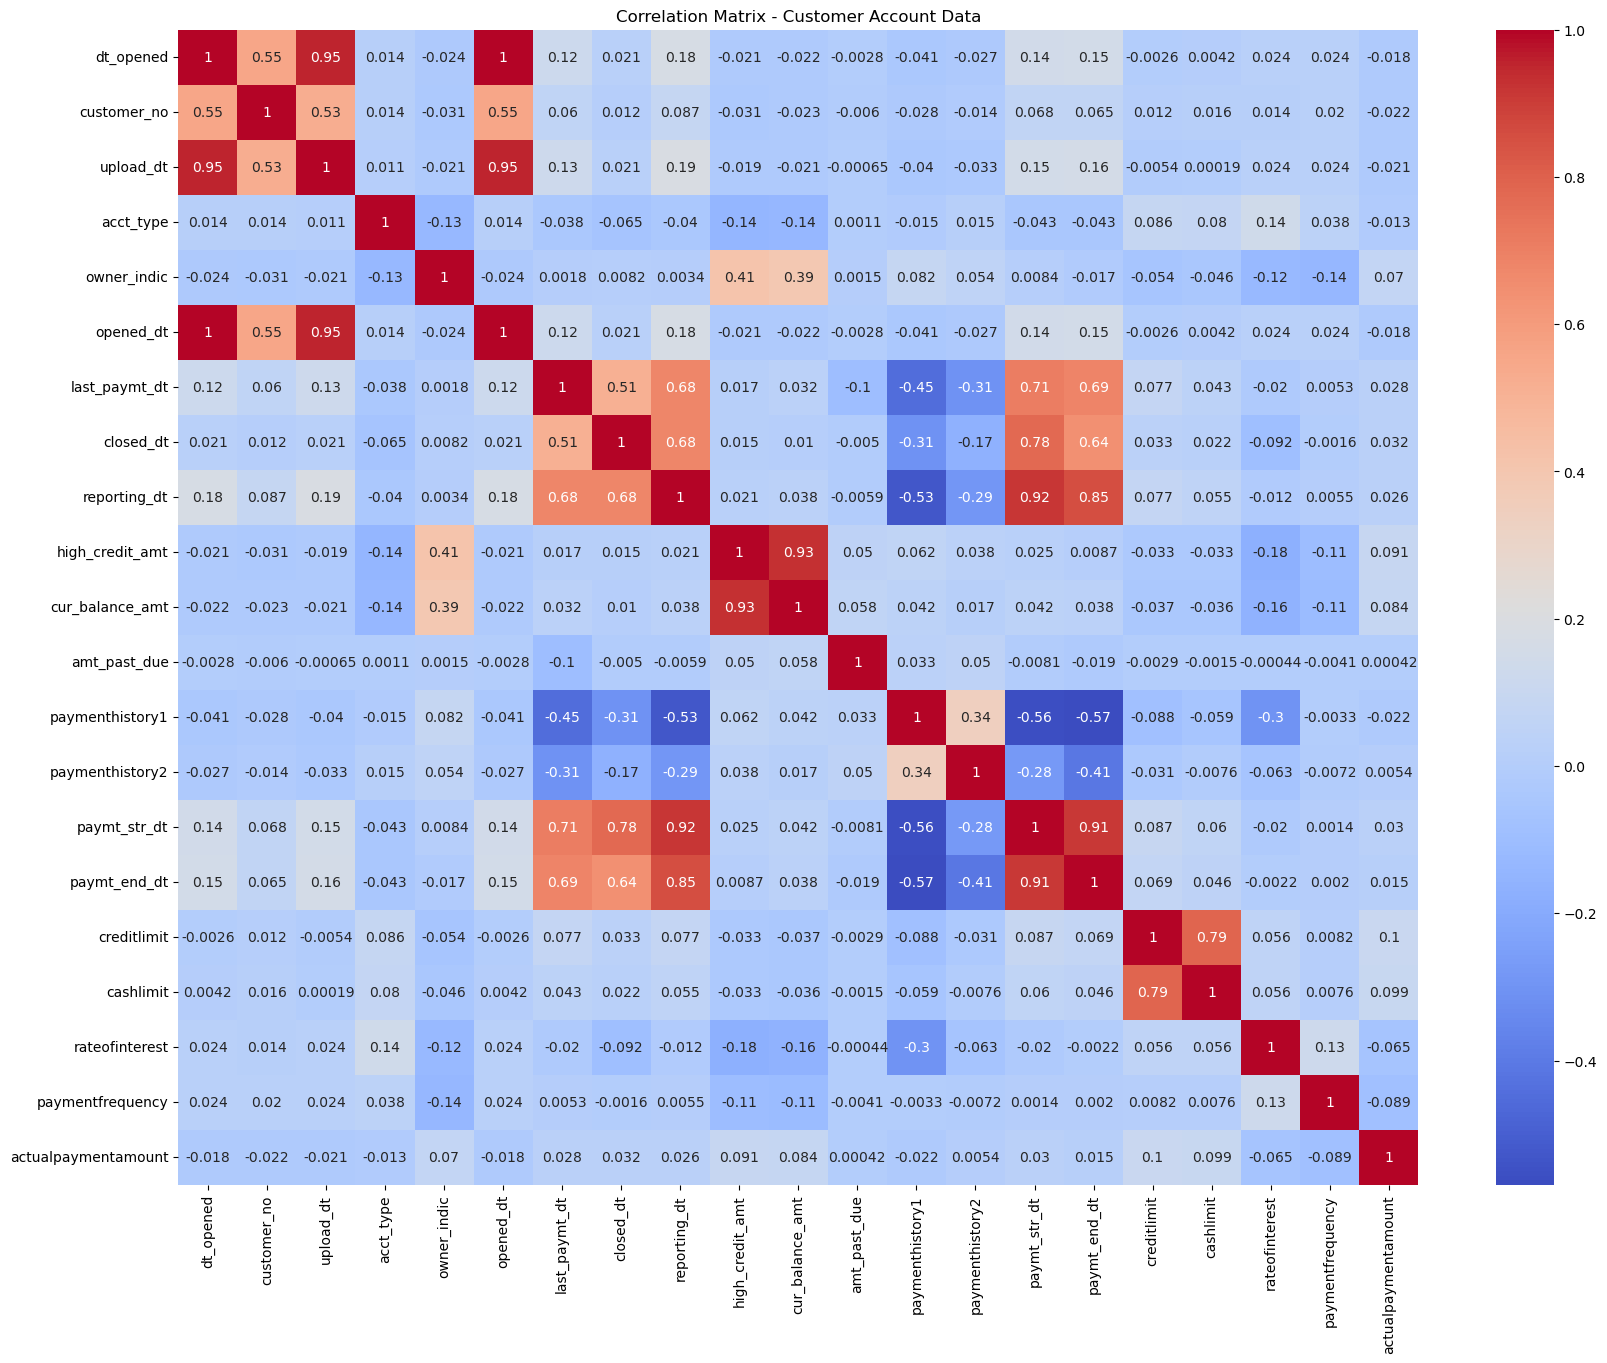

In [93]:
# Correlation matrix for numerical features in Customer Account Data
plt.figure(figsize=(20,15))
sns.heatmap(df_account.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Customer Account Data")
plt.show()

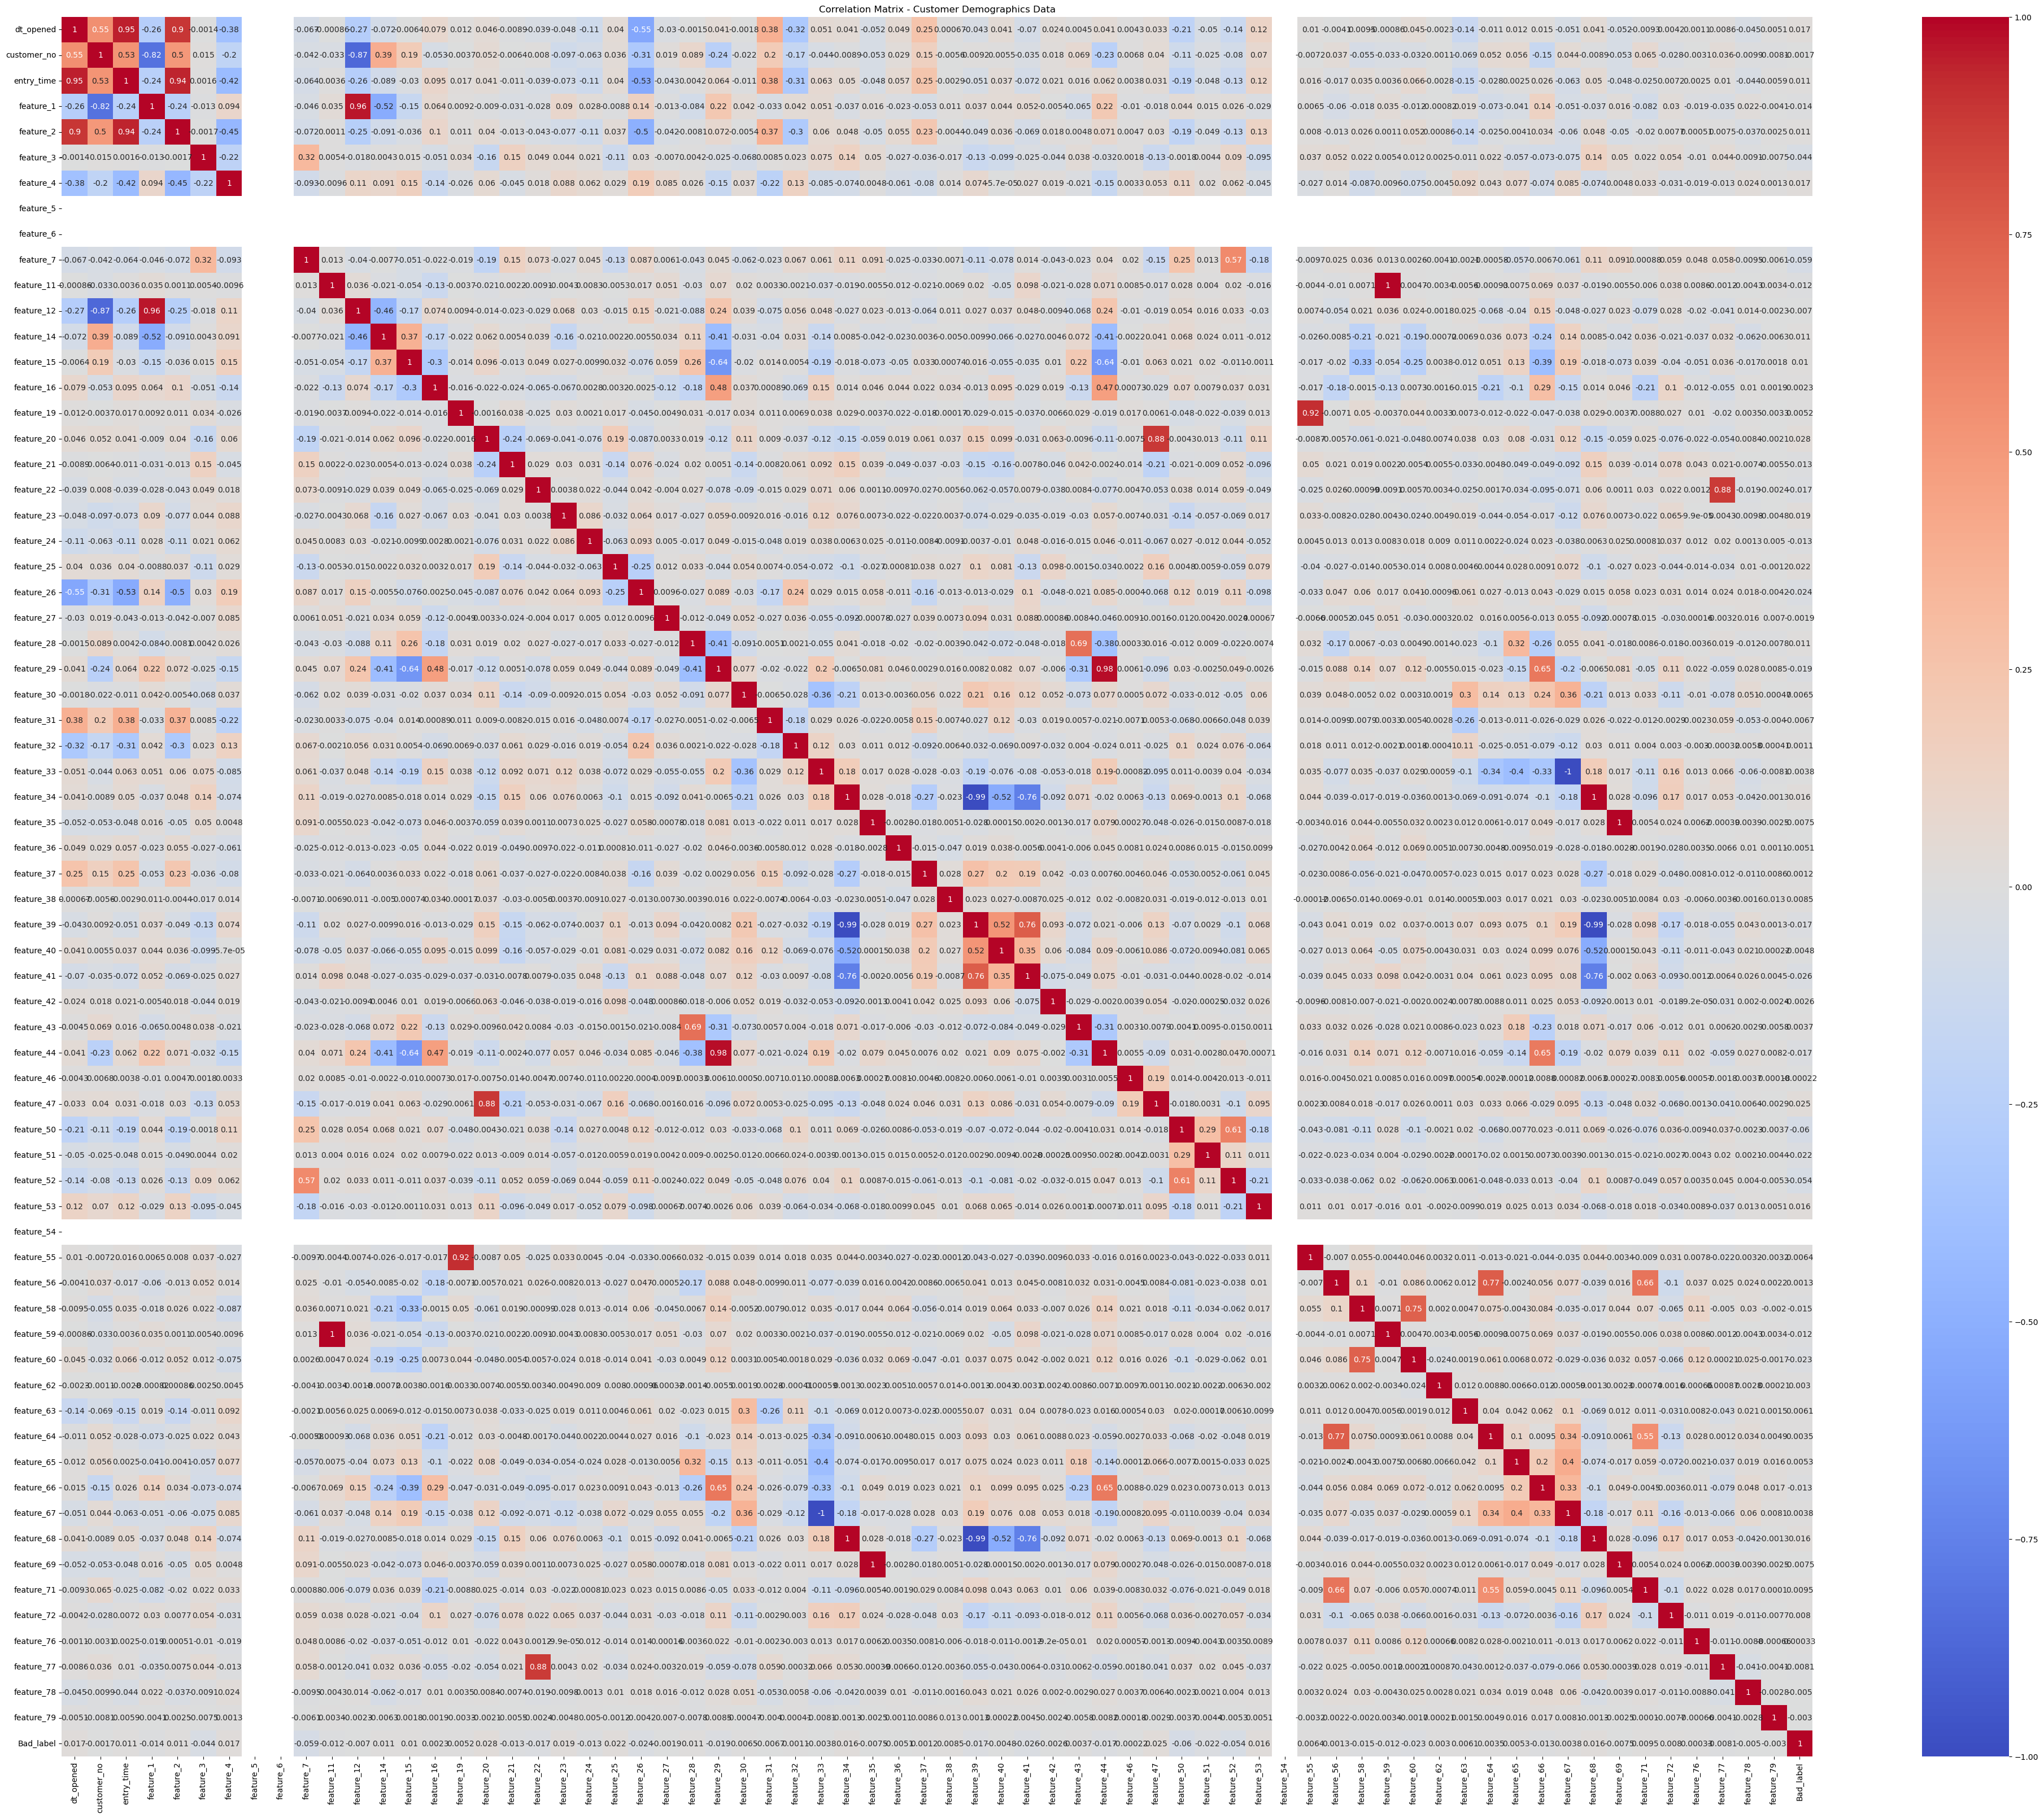

In [94]:
# Correlation matrix for numerical features in Customer Demographics Data
plt.figure(figsize=(50,40))
sns.heatmap(df_demographics.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Customer Demographics Data")
plt.show()

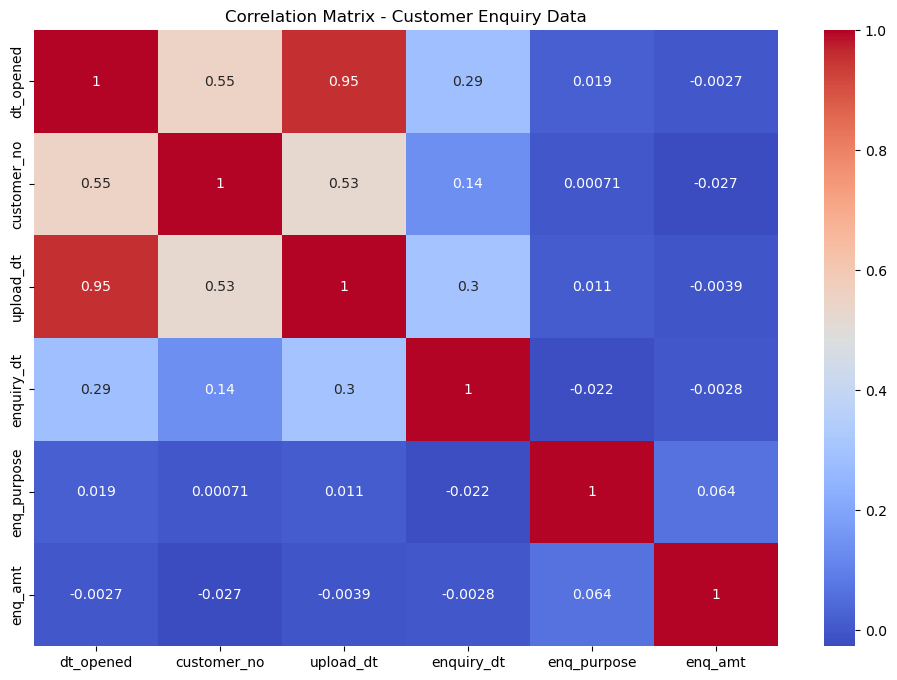

In [95]:
# Correlation matrix for numerical features in Customer Enquiry Data
plt.figure(figsize=(12,8))
sns.heatmap(df_enquiry.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Customer Enquiry Data")
plt.show()

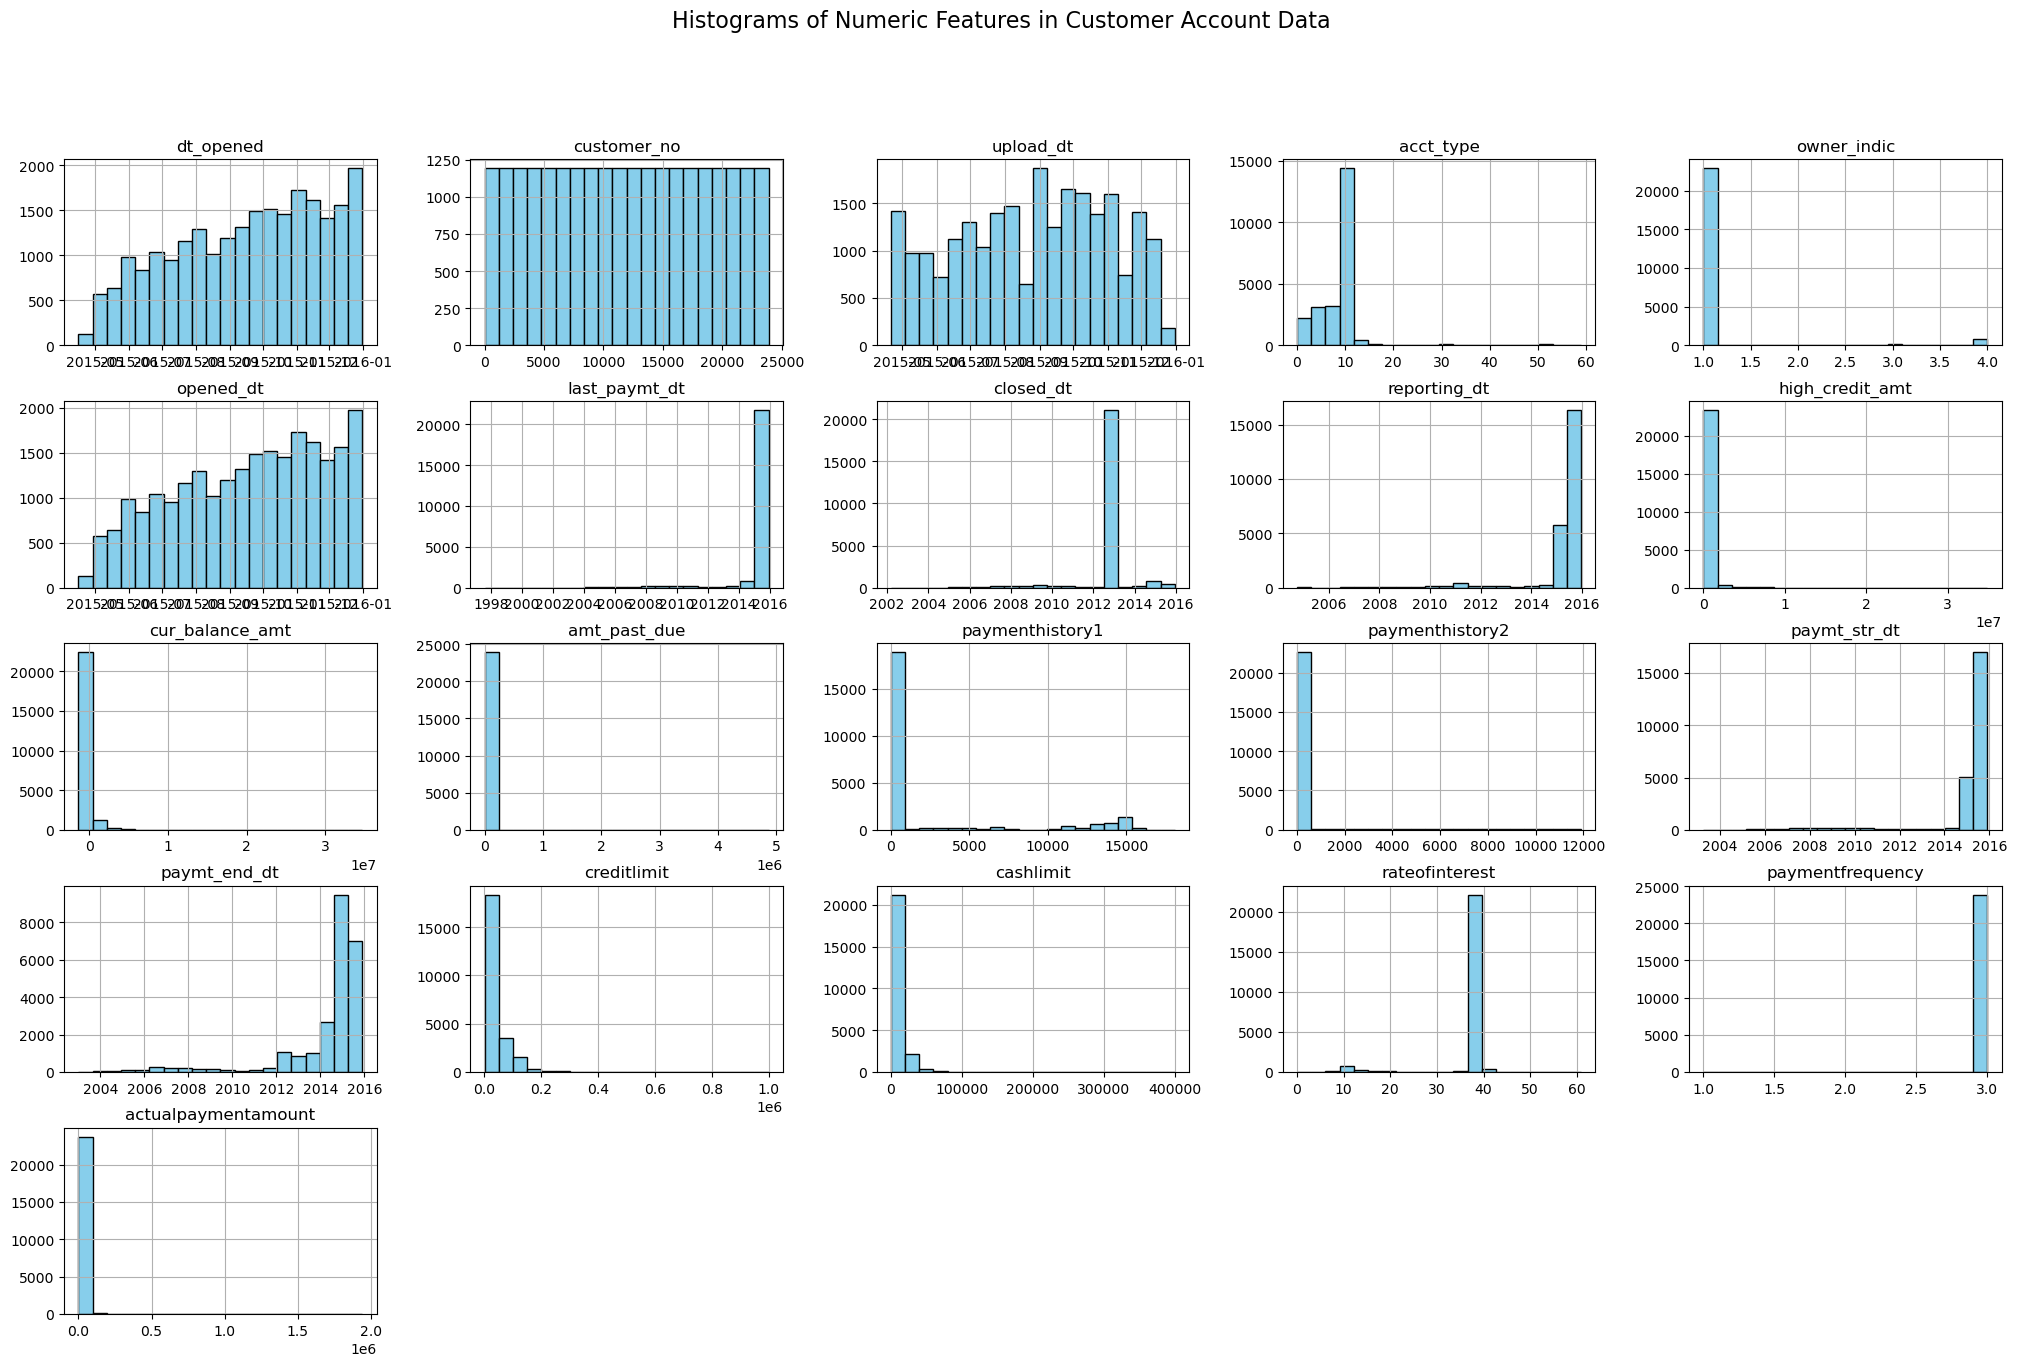

In [96]:
# Histogram: Distribution of numerical features
df_account.hist(bins=20, figsize=(25, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features in Customer Account Data", fontsize=16)
plt.show()

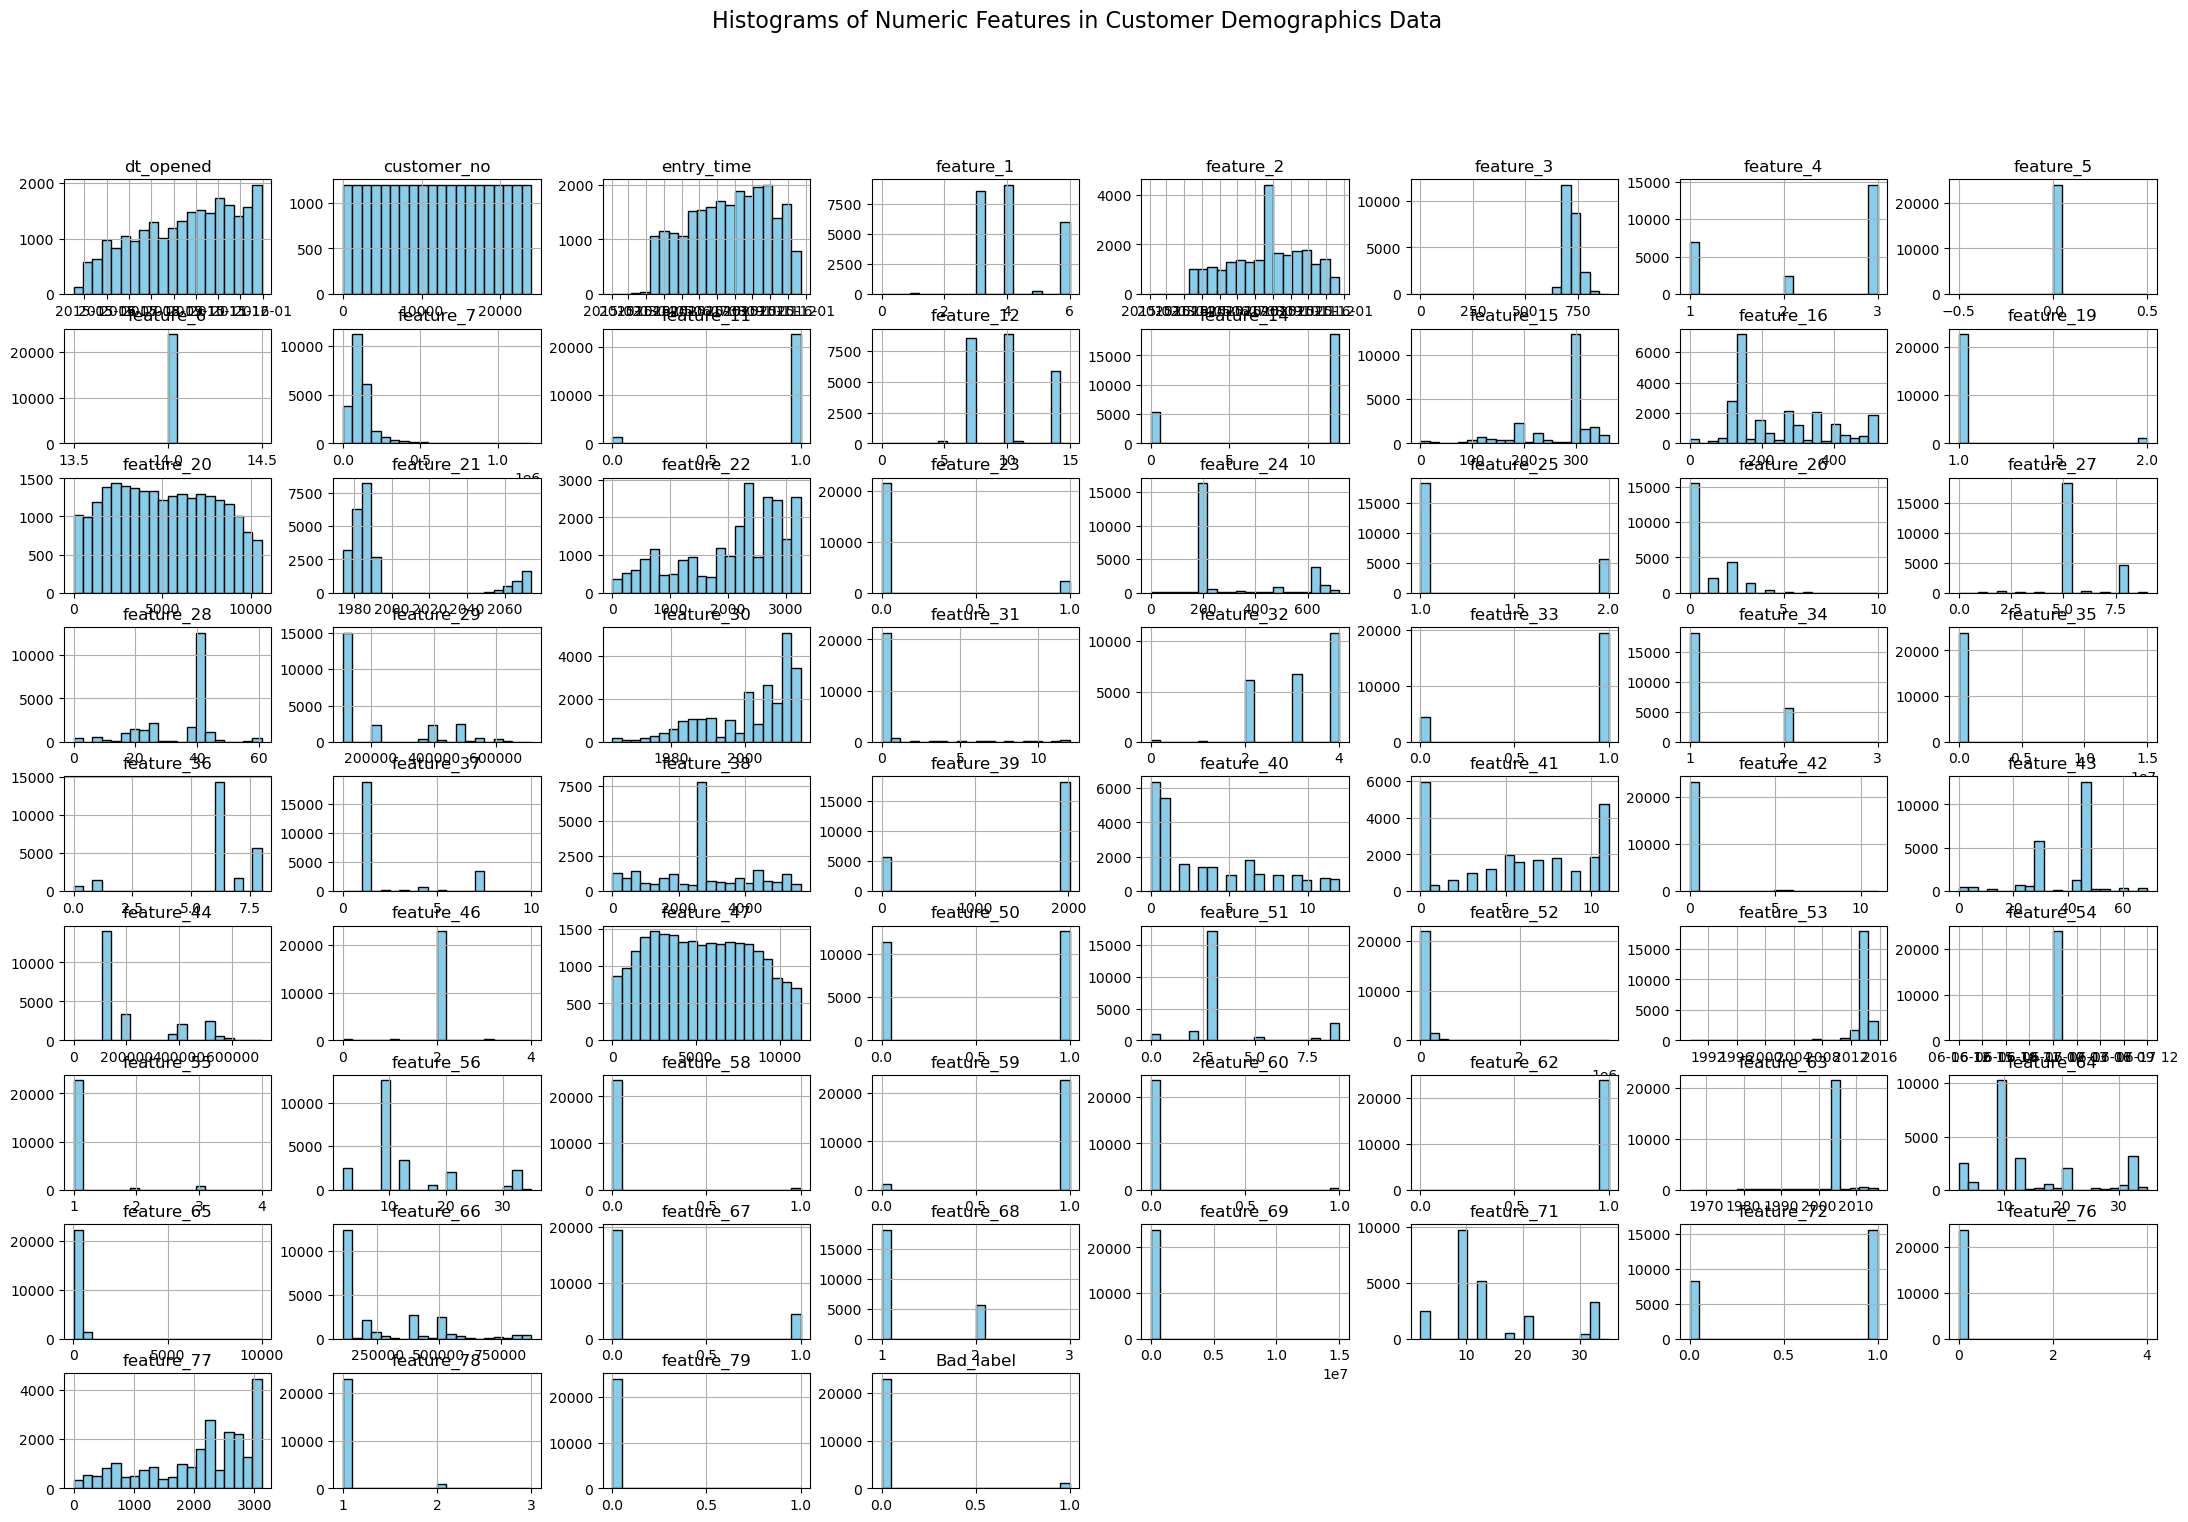

In [97]:
# Histogram: Distribution of numerical features
df_demographics.hist(bins=20, figsize=(27, 17), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features in Customer Demographics Data", fontsize=16)
plt.show()

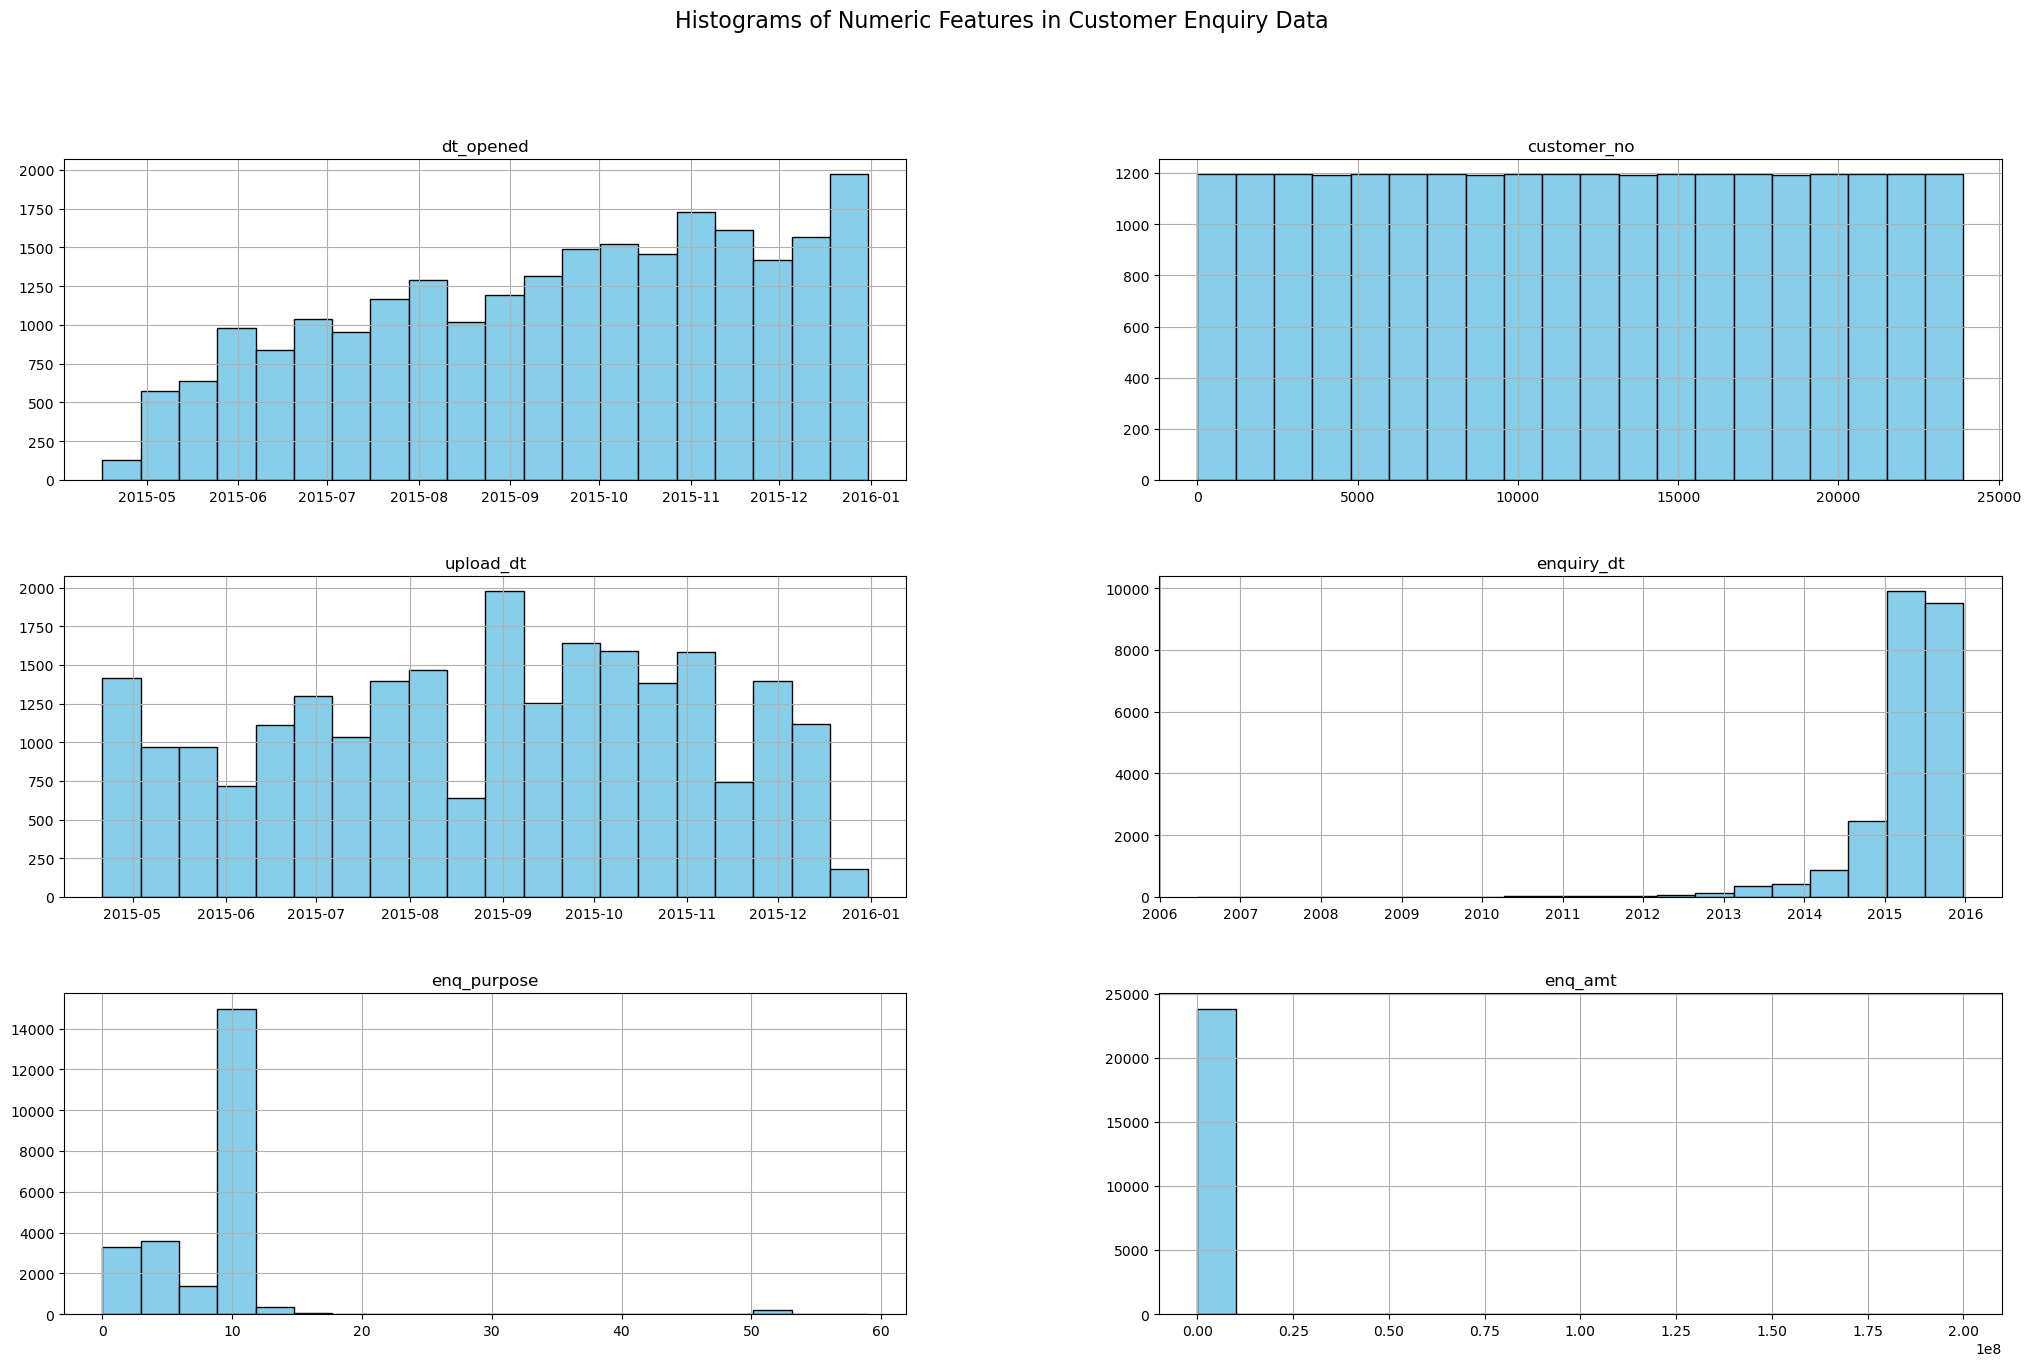

In [98]:
# Histogram: Distribution of numerical features
df_enquiry.hist(bins=20, figsize=(25, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features in Customer Enquiry Data", fontsize=16)
plt.show()

In [99]:
import sweetviz as sv #  library for univariant analysis

In [100]:
# Analyze df_account
account_report = sv.analyze(df_account)
account_report.show_html(filepath='df_account_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report df_account_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [101]:
# Analyze df_enquiry
enquiry_report = sv.analyze(df_enquiry)
enquiry_report.show_html(filepath='df_enquiry_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report df_enquiry_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [102]:
# Analyze df_demographics
demographics_report = sv.analyze(df_demographics)
demographics_report.show_html(filepath='df_demographics_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report df_demographics_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


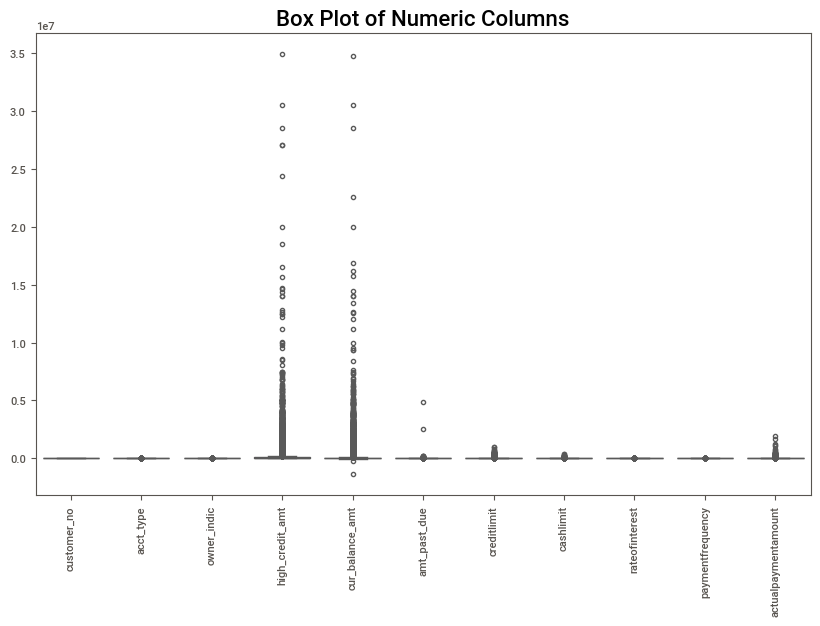

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_account.select_dtypes(include=['float64', 'int64']), palette="Set2")
plt.title("Box Plot of Numeric Columns", fontsize=16)
plt.xticks(rotation=90)
plt.show()

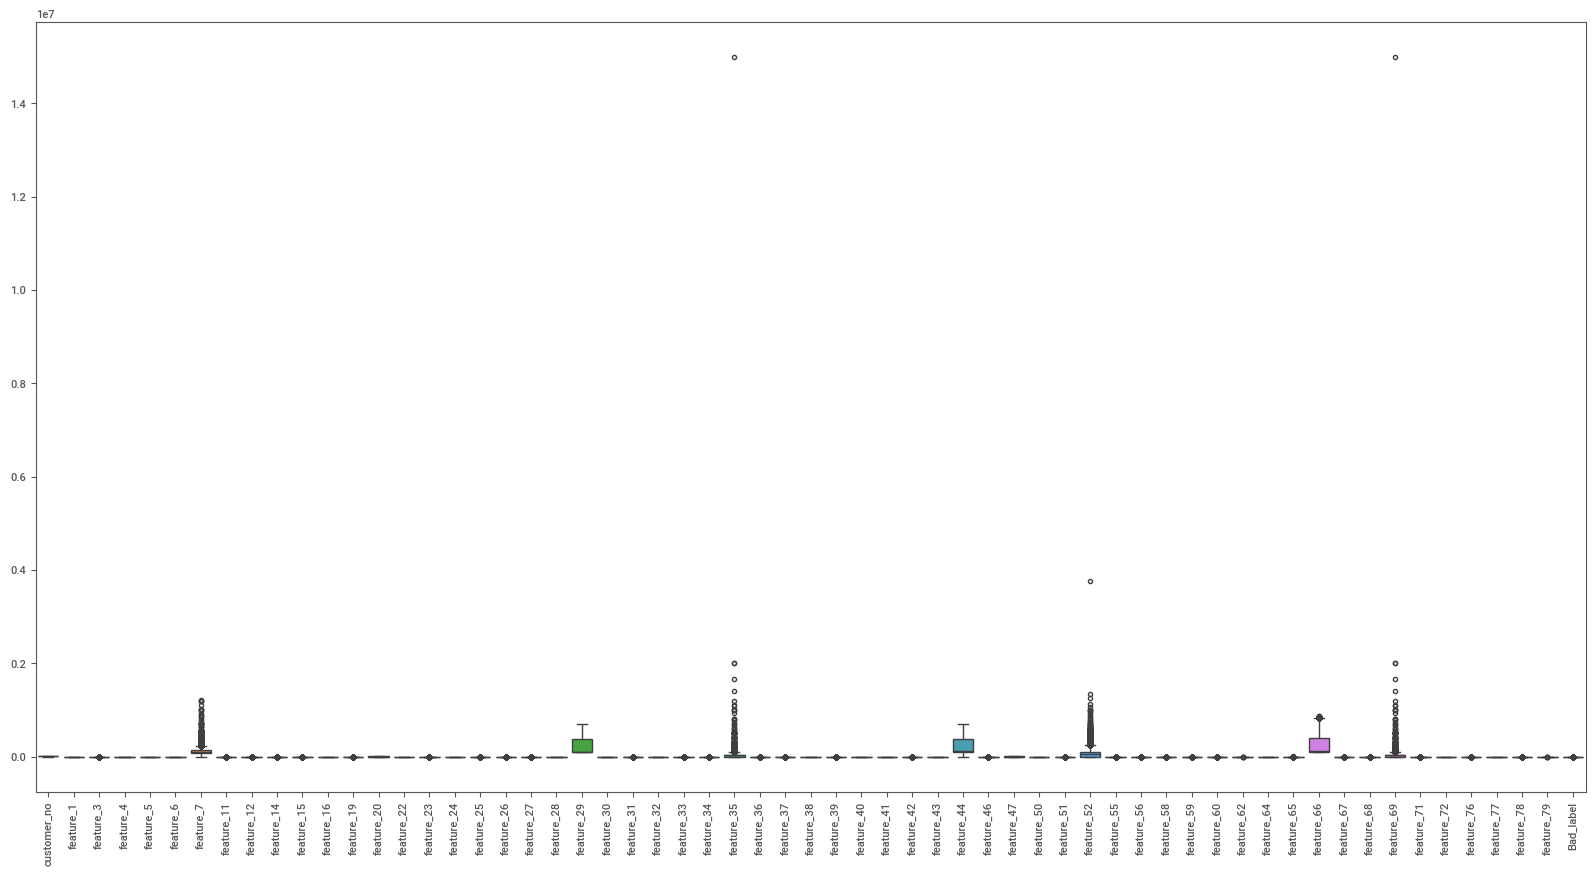

In [104]:
# Visualize feature importances
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_demographics)
plt.xticks(rotation=90)
plt.show()

C:\Users\prame\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


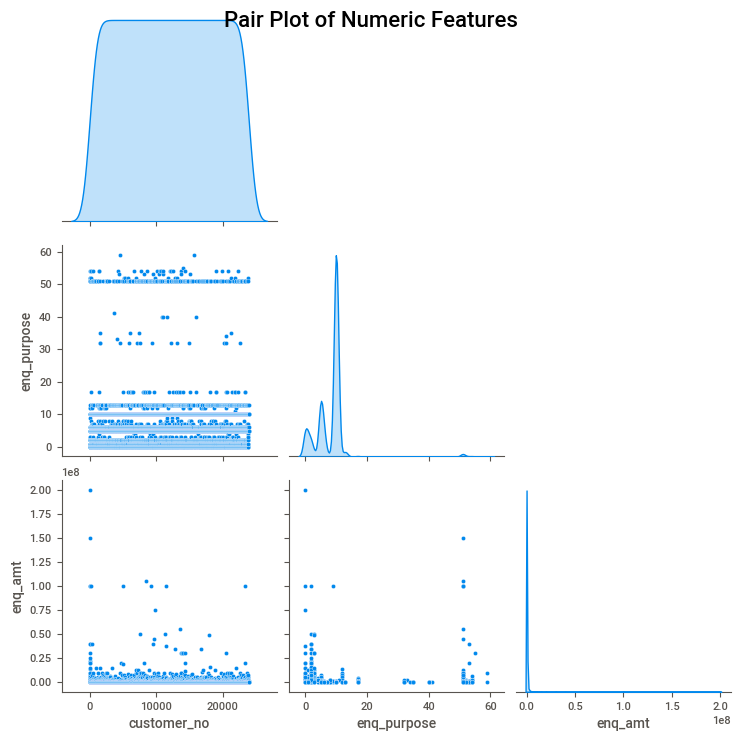

In [105]:
# Pair Plot: Relationships between numeric variables
sns.pairplot(df_enquiry.select_dtypes(include=['int64']), corner=True, diag_kind='kde')
plt.suptitle("Pair Plot of Numeric Features", fontsize=16)
plt.show()

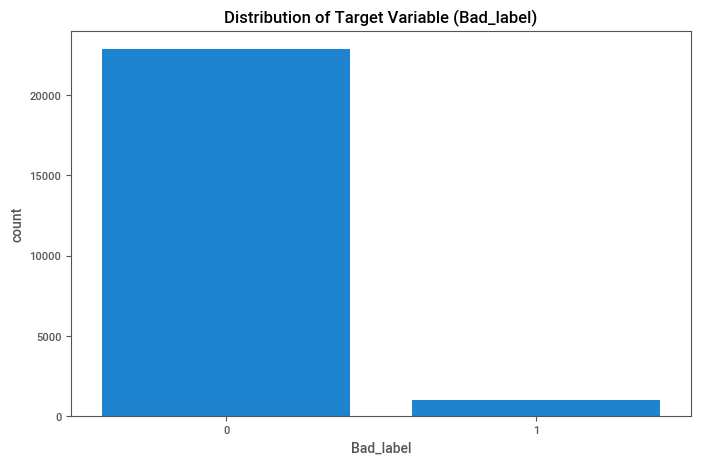

In [106]:
# Assuming the target variable is in demographics data
plt.figure(figsize=(8,5))
sns.countplot(x='Bad_label', data=df_demographics)
plt.title("Distribution of Target Variable (Bad_label)")
plt.show()

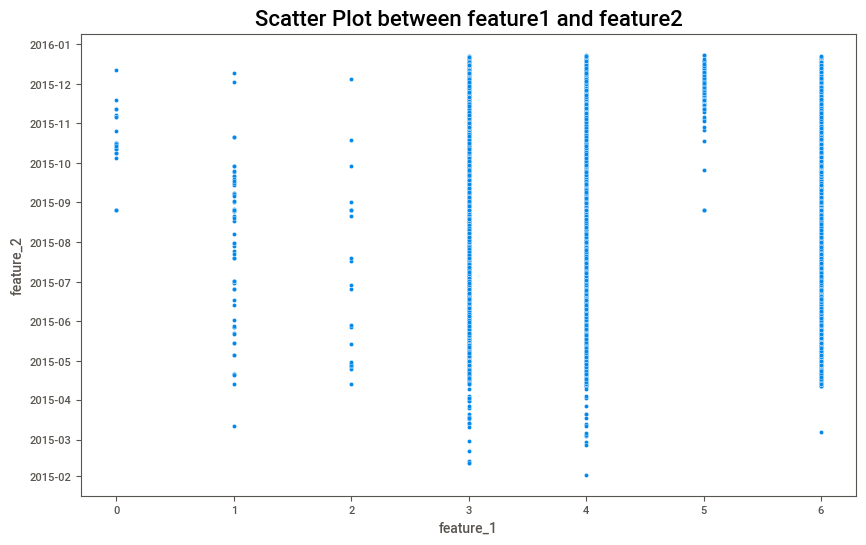

In [107]:
# Scatter Plot: Relationships between two numeric variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='feature_1', y='feature_2', data=df_demographics)
plt.title("Scatter Plot between feature1 and feature2", fontsize=16)
plt.show()

In [108]:
# Merge df_account and df_demographics with an outer join on 'customer_id'
master_df = pd.merge(df_account, df_demographics, on='customer_no', how='inner')

In [109]:
# Merge the resulting DataFrame with df_enquiry on 'customer_id'
master_df = pd.merge(master_df, df_enquiry, on='customer_no', how='inner')

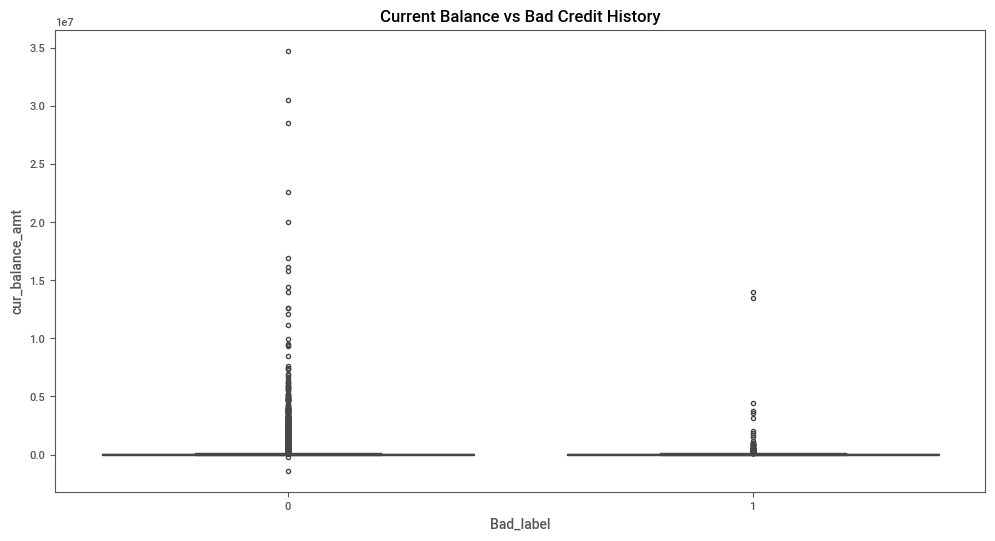

In [110]:
# Boxplot of key features vs target variable
plt.figure(figsize=(12,6))
sns.boxplot(x='Bad_label', y='cur_balance_amt', data=master_df)
plt.title("Current Balance vs Bad Credit History")
plt.show()

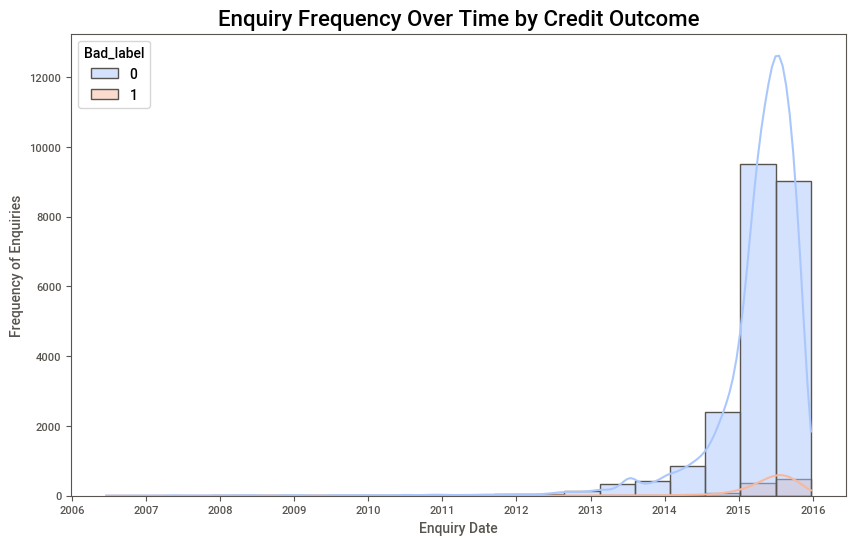

In [111]:
# Create a time series plot to show the frequency of enquiries over time
plt.figure(figsize=(10, 6))
sns.histplot(x='enquiry_dt', hue='Bad_label', data=master_df, bins=20, kde=True, palette='coolwarm')
plt.title('Enquiry Frequency Over Time by Credit Outcome', fontsize=16)
plt.xlabel('Enquiry Date')
plt.ylabel('Frequency of Enquiries')
plt.show()

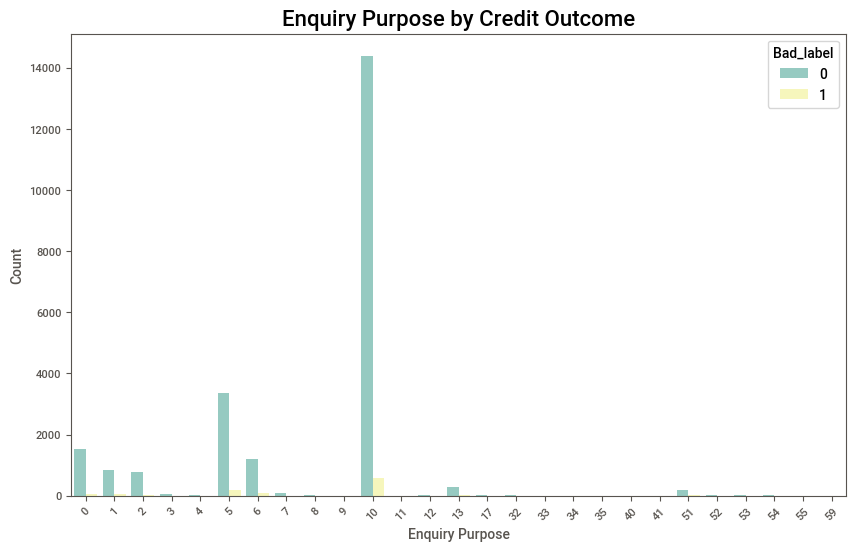

In [112]:
# Bar plot of enquiry purposes by credit outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='enq_purpose', hue='Bad_label', data=master_df, palette='Set3')
plt.title('Enquiry Purpose by Credit Outcome', fontsize=16)
plt.xlabel('Enquiry Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [113]:
# Feature engineering: payment history average days past due (dpd) for 0-29 days
df_account['payment_history_avg_dpd_0_29_bucket'] = df_account[['paymenthistory1', 'paymenthistory2']].mean(axis=1)

In [114]:
# Feature engineering: ratio of current balance to credit limit
df_account['ratio_currbalance_creditlimit'] = df_account['cur_balance_amt'] / df_account['creditlimit']

In [115]:
# View the new features
df_account[['payment_history_avg_dpd_0_29_bucket', 'ratio_currbalance_creditlimit']].head()

payment_history_avg_dpd_0_29_bucket  ratio_currbalance_creditlimit
0                                7857.5                       0.000000
3                                7010.5                       0.000000
17                                  8.5                       0.000000
22                              12338.0                       0.000000
76                                 13.5                       0.130888

In [116]:
# total_diff_lastpaymt_opened_dt
df_account['total_diff_lastpaymt_opened_dt'] = (df_account['last_paymt_dt'] - df_account['opened_dt']).dt.days
df_account['total_diff_lastpaymt_opened_dt'] = df_account['total_diff_lastpaymt_opened_dt'].abs()

In [117]:
# utilisation_trend
df_account['utilisation_ratio'] = df_account['cur_balance_amt'] / df_account['creditlimit']
# Assuming you have a time component or several periods of balance data
df_account['utilisation_trend'] = df_account['utilisation_ratio'] / df_account['utilisation_ratio'].mean()


In [118]:
# Days Since Last Payment
df_account['days_since_last_payment'] = (pd.to_datetime('today') - pd.to_datetime(df_account['last_paymt_dt'])).dt.days

In [119]:
df_enquiry['max_freq_enquiry'] = df_enquiry.groupby('customer_no')['enq_purpose'].transform(lambda x: x.mode()[0])

In [120]:
unsecured_purposes = ['Personal Loan', 'Credit Card']  # Example list of unsecured loan types
df_enquiry['unsecured_loans'] = df_enquiry['enq_purpose'].apply(lambda x: 1 if x in unsecured_purposes else 0)
df_enquiry['total_enquiries'] = df_enquiry.groupby('customer_no')['enq_purpose'].transform('count')
df_enquiry['perc_unsecured_others'] = df_enquiry.groupby('customer_no')['unsecured_loans'].transform('sum')


In [121]:
# So these features have been selected:

# perc_unsecured_others
# max_freq_enquiry
# Ratio_currbalance_creditlimit
# utilisation_trend
# total_diff_lastpaymt_opened_dt
# payment_history_avg_dpd_0_29_bucket

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
df_merged = df_account.merge(df_enquiry, on='customer_no', how = 'left')

In [124]:
# Sample DataFrame creation 
X = df_merged[['perc_unsecured_others', 'max_freq_enquiry', 'days_since_last_payment', 'ratio_currbalance_creditlimit', 'utilisation_trend', 'total_diff_lastpaymt_opened_dt', 'payment_history_avg_dpd_0_29_bucket']]
y = df_demographics['Bad_label']  # Target variable

In [125]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB()
}

In [127]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")


Model: Logistic Regression
Mean Absolute Error (MAE): 0.04142259414225941
Mean Squared Error (MSE): 0.04142259414225941
R-squared: -0.04321257092972486

Model: Decision Tree
Mean Absolute Error (MAE): 0.08410041841004184
Mean Squared Error (MSE): 0.08410041841004184
R-squared: -1.1180376440088353

Model: Random Forest
Mean Absolute Error (MAE): 0.04205020920502092
Mean Squared Error (MSE): 0.04205020920502092
R-squared: -0.05901882200441766

Model: SVC
Mean Absolute Error (MAE): 0.04142259414225941
Mean Squared Error (MSE): 0.04142259414225941
R-squared: -0.04321257092972486

Model: KNN
Mean Absolute Error (MAE): 0.04184100418410042
Mean Squared Error (MSE): 0.04184100418410042
R-squared: -0.053750071646186726

Model: Gaussian NB
Mean Absolute Error (MAE): 0.04142259414225941
Mean Squared Error (MSE): 0.04142259414225941
R-squared: -0.04321257092972486


In [128]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
rfc_model.score(X_train, y_train)

0.9993722536095417

In [130]:
# Evaluate the model
print("Model Accuracy RandomForestClassifier:", rfc_model.score(X_test, y_test))

Model Accuracy RandomForestClassifier: 0.9579497907949791


In [131]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [132]:
lr_model.score(X_train, y_train)

0.9578363674408872

In [133]:
# Evaluate the model
print("Model Accuracy LogisticRegression:", lr_model.score(X_test, y_test))

Model Accuracy LogisticRegression: 0.9585774058577405


In [134]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [135]:
dtc_model.score(X_train, y_train)

0.9994768780079515

In [136]:
# Evaluate the model
print("Model Accuracy DecisionTreeClassifier:", dtc_model.score(X_test, y_test))

Model Accuracy DecisionTreeClassifier: 0.9158995815899582


In [137]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [138]:
nb_model.score(X_train, y_train)

0.9578363674408872

In [139]:
# Evaluate the model
print("Model Accuracy GaussianNB:", nb_model.score(X_test, y_test))

Model Accuracy GaussianNB: 0.9585774058577405


In [140]:
knn_model = KNeighborsClassifier()  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [141]:
knn_model.score(X_train, y_train)

0.9578886796400921

In [142]:
# Evaluate the model
print("Model Accuracy KNN:", knn_model.score(X_test, y_test))

Model Accuracy KNN: 0.9581589958158996


In [143]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Classification Report: {classification_report(y_test, y_pred)}")


Model: Logistic Regression
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780



C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Decision Tree
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.95      0.96      4582
           1       0.06      0.07      0.06       198

    accuracy                           0.92      4780
   macro avg       0.51      0.51      0.51      4780
weighted avg       0.92      0.92      0.92      4780


Model: Random Forest
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780


Model: SVC
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   

C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: KNN
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.25      0.01      0.01       198

    accuracy                           0.96      4780
   macro avg       0.60      0.50      0.49      4780
weighted avg       0.93      0.96      0.94      4780


Model: Gaussian NB
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780



C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
# Train the Random Forest model
Final_model = RandomForestClassifier(random_state=42)
Final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [145]:
# Get feature importance
importance = Final_model.feature_importances_

In [146]:
# Create a DataFrame to hold features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Gain': importance
})

In [147]:
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Gain', ascending=False)

In [148]:
feature_importance_df

Feature      Gain
5       total_diff_lastpaymt_opened_dt  0.218798
3        ratio_currbalance_creditlimit  0.214222
4                    utilisation_trend  0.214086
2              days_since_last_payment  0.164940
6  payment_history_avg_dpd_0_29_bucket  0.140870
1                     max_freq_enquiry  0.047083
0                perc_unsecured_others  0.000000

In [149]:
# Using Randomized Search Cross Validation(CV) in Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [151]:
model=RandomForestClassifier(max_depth=3,
                            criterion='gini',
                            n_estimators=10,
                            random_state=5)
parameters={'max_depth': [2,3],
              'n_estimators':[10,20],
              'random_state' : [5]}
randomized=RandomizedSearchCV(model,parameters,scoring='accuracy',cv=5)
randomized.fit(X_train,y_train)

C:\Users\prame\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=3,
                                                    n_estimators=10,
                                                    random_state=5),
                   param_distributions={'max_depth': [2, 3],
                                        'n_estimators': [10, 20],
                                        'random_state': [5]},
                   scoring='accuracy')

In [152]:
print("Best Score =  ",randomized.best_score_)
print("Best Params = ",randomized.best_params_)

Best Score =   0.9578363779239727
Best Params =  {'random_state': 5, 'n_estimators': 10, 'max_depth': 2}


In [153]:
# Predict the model
y_train_predict=randomized.predict(X_train)
y_predict=randomized.predict(X_test)

In [154]:
print("\n Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("\n Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)


 Accuracy of Training =  95.78363674408872

 Accuracy of Testing =   95.85774058577405


In [155]:
# Calculating Precision score, recall score and F1 score
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Precision score =  91.88706430209555
Recall score =  95.85774058577405
F1 score =  93.83041387823472


C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
# Genarating classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780



C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prame\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
# Train the Random Forest model
Final_model = RandomForestClassifier(random_state=42)
Final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [158]:
# Predictions
y_pred = Final_model.predict(X_test)
y_pred_prob = Final_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [160]:
# Evaluate
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred))

AUC-ROC: 0.5046173211821401
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4582
           1       0.00      0.00      0.00       198

    accuracy                           0.96      4780
   macro avg       0.48      0.50      0.49      4780
weighted avg       0.92      0.96      0.94      4780



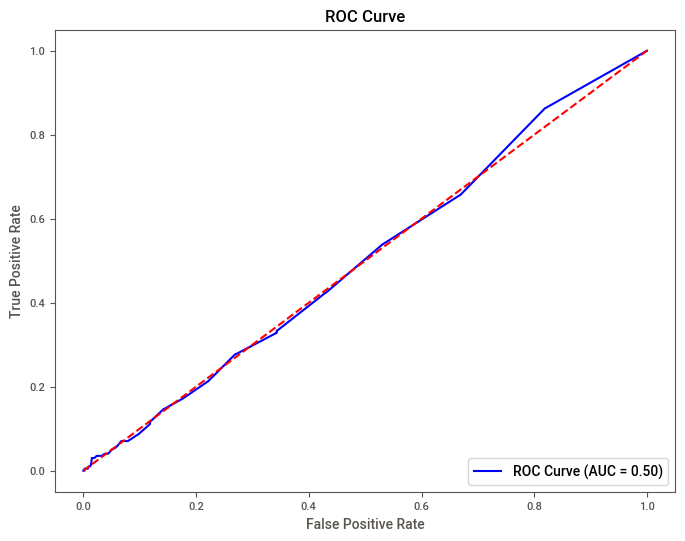

In [161]:
# Evaluate the performance of a binary classifier model(ROC-Curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [162]:
# Assuming y_true is the actual target (0 or 1) and y_pred are the predicted probabilities
y_true = df_demographics['Bad_label']  # Actual labels (0 or 1)
y_pred = Final_model.predict_proba(X)[:, 1]  # Predicted probabilities for class 1

In [163]:
# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_true, y_pred)

In [164]:
# Calculate Gini coefficient
gini = 2 * auc - 1
print(f"Gini coefficient: {gini}")

Gini coefficient: 0.8694513401922626


In [165]:
# Convert to percentage
gini_percentage = gini * 100

In [166]:
gini_percentage

86.94513401922626

In [167]:
# Create a DataFrame for actual and predicted values
df_eval = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

In [168]:
# Sort by predicted probabilities
df_eval = df_eval.sort_values(by='y_pred', ascending=False)

In [169]:
# Create deciles (10 equally sized groups) and drop duplicates in bin edges
df_eval['decile'] = pd.qcut(df_eval['y_pred'], 10, labels=False, duplicates='drop')

In [170]:
# Calculate the mean target rate in each decile (i.e., proportion of 'Bad_label' = 1)
rank_ordering = df_eval.groupby('decile').agg({'y_true': ['mean', 'count']}).reset_index()
rank_ordering.columns = ['decile', 'bad_rate', 'count']

In [171]:
# rank_ordering

C:\Users\prame\AppData\Local\Temp\ipykernel_12004\2177845671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='decile', y='bad_rate', data=rank_ordering, palette='Blues_d')


Text(0, 0.5, 'Bad Rate (Proportion of Bad Label)')

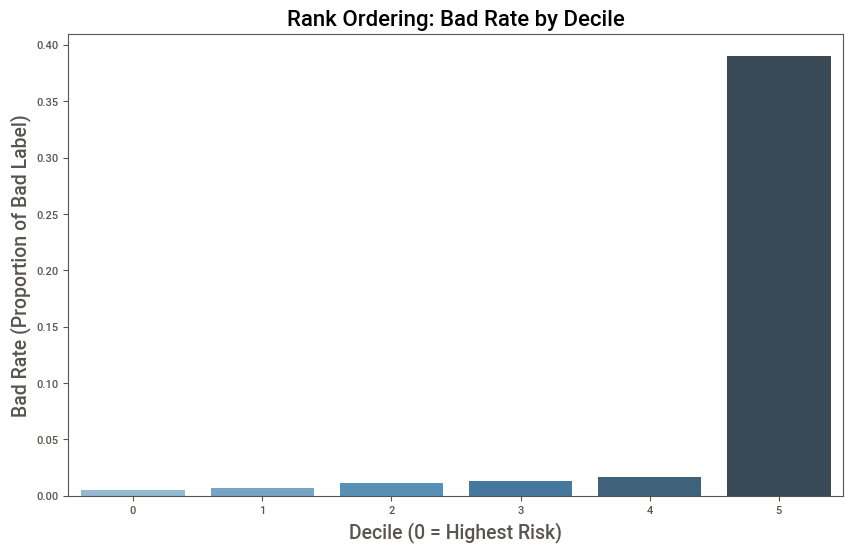

In [172]:
# Plotting the rank ordering
plt.figure(figsize=(10, 6))
sns.barplot(x='decile', y='bad_rate', data=rank_ordering, palette='Blues_d')

# Adding titles and labels
plt.title('Rank Ordering: Bad Rate by Decile', fontsize=16)
plt.xlabel('Decile (0 = Highest Risk)', fontsize=14)
plt.ylabel('Bad Rate (Proportion of Bad Label)', fontsize=14)

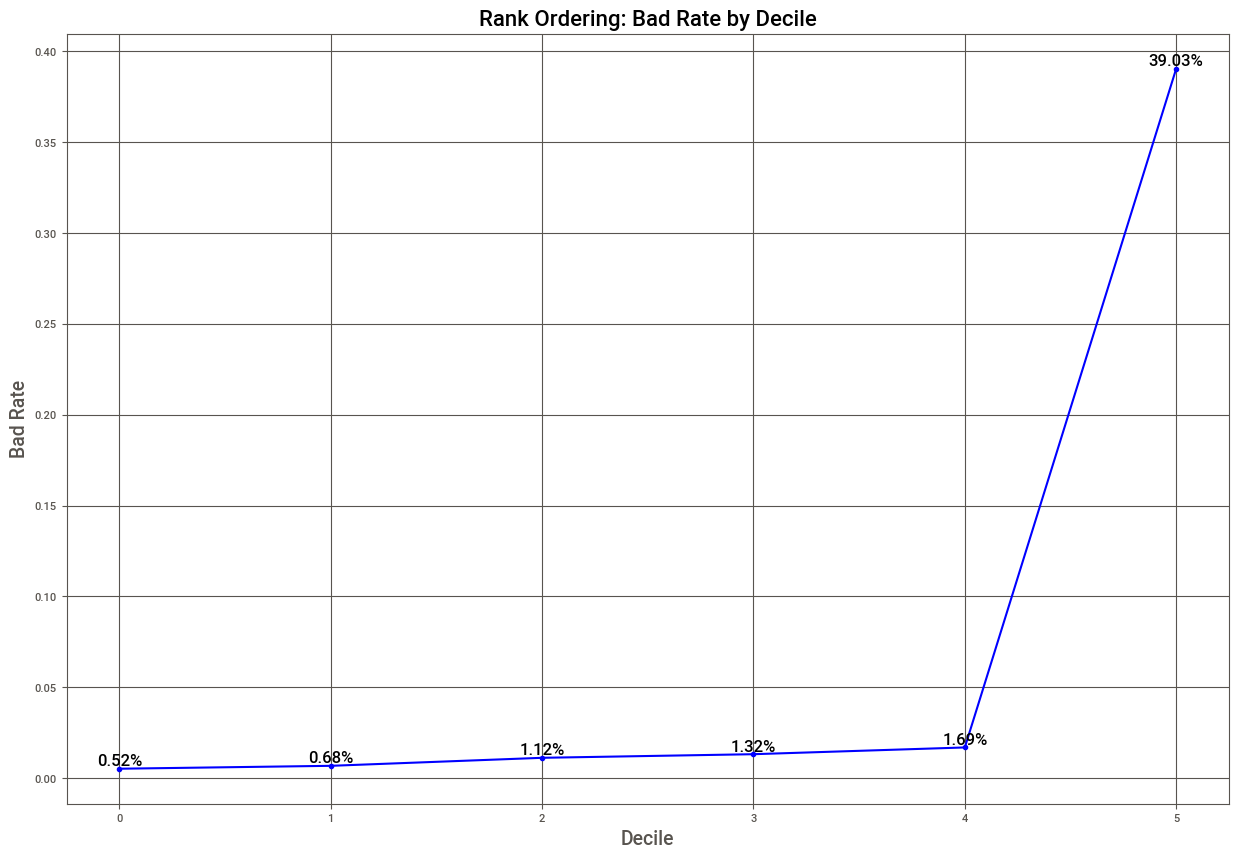

In [173]:
# Create the plot
plt.figure(figsize=(15, 10))
plt.plot(rank_ordering['decile'], rank_ordering['bad_rate'], marker='o', color='b', linestyle='-')  # Line chart with markers

# Add title and labels
plt.title('Rank Ordering: Bad Rate by Decile', fontsize=16)
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Bad Rate', fontsize=14)

# Annotate the points with percentages
for i, rate in enumerate(rank_ordering['bad_rate']):
    plt.text(rank_ordering['decile'][i], rate, f'{rate*100:.2f}%', fontsize=12, ha='center', va='bottom')

# Display the chart
plt.grid(True)
plt.show()

In [174]:
# Challenges Faced in this project

# Data Quality and Integrity:
# Missing Values: Some datasets may have missing or incomplete data, making it difficult to build a robust model.
# Duplicate Records: Duplicate entries in df_account and df_enquiry had to be handled carefully to avoid skewing the results.

# Feature Engineering:
# Complex Feature Derivation: Features like perc_unsecured_others, utilisation_trend, and mean_diff_lastpaymt_opened_dt required 
# complex calculations and transformations, which took time and effort to derive correctly.
# Negative Values in Features: Some derived features, like mean_diff_lastpaymt_opened_dt, had negative values that needed 
# careful handling, such as transforming them from negative to positive where appropriate.

# Data Merging:
# Multiple Datasets: The selected features were spread across multiple datasets (df_account, df_enquiry, and df_demographics),
# making merging and aligning the data challenging, especially with inconsistent sample sizes between datasets.
# Inconsistent Records: Different datasets had varying numbers of samples, leading to potential mismatches and data alignment
# issues during the merging process.

# Outlier Management:
# Outliers: Some features displayed outliers (as seen in boxplots), posing a challenge in deciding whether to remove or 
# retain them based on their impact on the model’s performance.

# Model Performance Evaluation:
# Gini and Rank Ordering: Ensuring the model’s performance was accurately measured using Gini and rank ordering metrics required
# careful tuning and validation, especially when handling issues like duplicate bin edges in data.


In [175]:
# Business Case in banking:-
# 1. Fraud Detection and Prevention
# Objective: Develop a predictive model to detect fraudulent transactions in real-time.

# Benefits:
# Prevent financial losses by identifying fraudulent activities early.
# Protect customer accounts from unauthorized access and transactions.
# Build trust with customers through enhanced security.

# Challenges:
# Detecting fraud in real-time with high accuracy and low false positives.
# Handling large-scale transaction data and balancing between security and user experience.

# 2. Loan Default Prediction
# Objective: Create a model to predict which customers are likely to default on loans.

# Benefits:
# Reduce financial losses by identifying high-risk borrowers.
# Improve loan approval processes and tailor loan products to customer profiles.
# Enhance risk management practices and maintain a healthy loan portfolio.

# Challenges:
# Data quality issues and availability of historical data on loan repayments.
# Balancing between credit approval and avoiding high-risk customers.

# 3. Customer Churn Prediction
# Objective: Predict customers who are likely to leave the bank or stop using its services.

# Benefit: Reduce customer attrition and improve retention rates.
# Challenge: Accurately predicting churn with diverse customer data..